<a href="https://colab.research.google.com/github/GVSU-CIS635/projects-halved/blob/main/KDD_FINAL_GROUP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: Install and Setup Kaggle

In [1]:
"""
Alzheimer's Disease Pattern Discovery - Initial EDA
Team: Cynthia Mutua, Halee Belghouthi, Fedi Naimi, Jhansi Nalla
Dataset: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
"""


"\nAlzheimer's Disease Pattern Discovery - Initial EDA\nTeam: Cynthia Mutua, Halee Belghouthi, Fedi Naimi, Jhansi Nalla\nDataset: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset\n"

In [2]:
!pip install -q kaggle
from google.colab import files
import os

print(" Uploading the kaggle file:")
uploaded = files.upload()


 Uploading the kaggle file:


Saving alzheimers_disease_data.csv to alzheimers_disease_data.csv


STEP 3: IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

STEP 4: LOADING AND VERIFYING DATA

In [4]:
# Load the dataset
df = pd.read_csv('alzheimers_disease_data.csv')

print("DATASET VERIFICATION")
print(f"   Rows: {df.shape[0]:,}")
print(f"   Columns: {df.shape[1]}")
print(f"\n   Expected: 2,149 rows × 35 columns")

if df.shape[0] == 2149:
    print("   ✓ Row count matches proposal!")
else:
    print(f"  Row count different from proposal (expected 2,149)")

display(df)

DATASET VERIFICATION
   Rows: 2,149
   Columns: 35

   Expected: 2,149 rows × 35 columns
   ✓ Row count matches proposal!


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


STEP 5: DATA STRUCTURE ANALYSIS

In [5]:
print(" DATA STRUCTURE ANALYSIS")
print("\n Column Information:")
print(df.info())

print("DATA TYPES SUMMARY")

type_counts = df.dtypes.value_counts()
print(type_counts)

# Separate columns by type
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n Numeric columns: {len(numeric_cols)}")
print(f" Categorical columns: {len(categorical_cols)}")

 DATA STRUCTURE ANALYSIS

 Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  D

STEP 6: MISSING VALUES ANALYSIS

In [6]:
print(" MISSING VALUES ANALYSIS")

# Calculate missing values
missing = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})
missing = missing[missing['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing) > 0:
    print("\n  Columns with missing values:")
    display(missing)

    # Visualization
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Bar plot
    ax[0].barh(missing['Column'], missing['Missing_Percentage'], color='coral')
    ax[0].set_xlabel('Missing Percentage (%)')
    ax[0].set_title('Missing Values by Column')
    ax[0].grid(axis='x', alpha=0.3)

    # Heatmap
    sns.heatmap(df[missing['Column']].isnull(), cbar=True,
                yticklabels=False, cmap='viridis', ax=ax[1])
    ax[1].set_title('Missing Values Heatmap')

    plt.tight_layout()
    plt.show()

    print(f"\n FINDING FOR REPORT:")
    print(f"   Total missing values: {df.isnull().sum().sum():,}")
    print(f"   Percentage of dataset: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")
else:
    print("\n No missing values detected in the dataset!")


 MISSING VALUES ANALYSIS

 No missing values detected in the dataset!


STEP 7: TARGET VARIABLE ANALYSIS

 TARGET VARIABLE ANALYSIS: Diagnosis

 Diagnosis Distribution:
   Not Diagnosed (0): 1,389 patients (64.6%)
   Diagnosed with Alzheimer's (1): 760 patients (35.4%)

  CLASS IMBALANCE DETECTED:
   Imbalance ratio: 1.83:1
 This requires stratified sampling in train-test split!


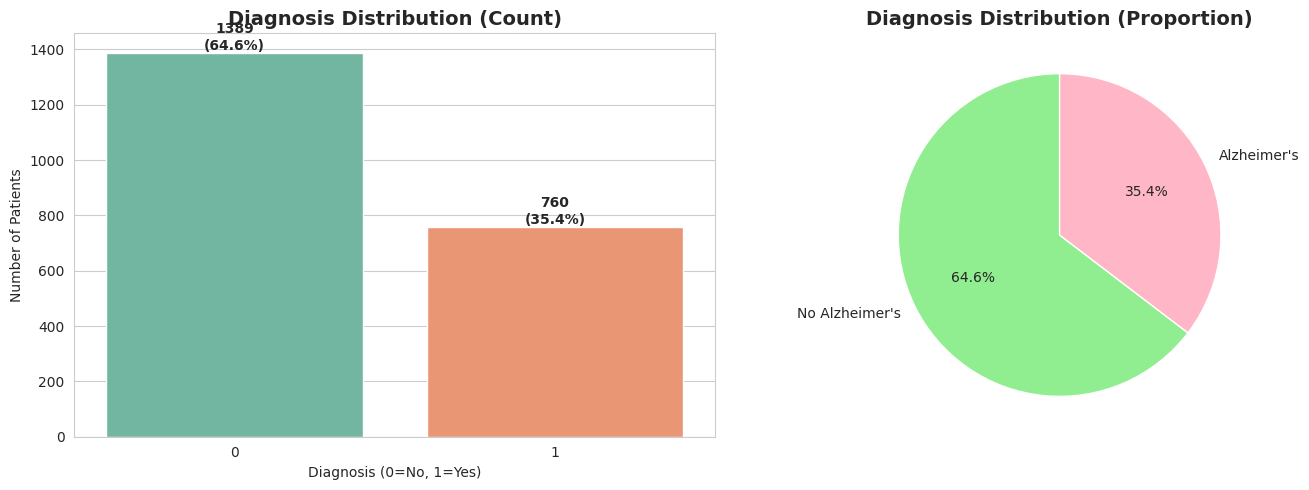

In [7]:
print(" TARGET VARIABLE ANALYSIS: Diagnosis")

# Check if Diagnosis column exists
diagnosis_col = 'Diagnosis' if 'Diagnosis' in df.columns else None

if diagnosis_col:
    # Value counts
    diagnosis_counts = df[diagnosis_col].value_counts()
    diagnosis_pct = df[diagnosis_col].value_counts(normalize=True) * 100

    print("\n Diagnosis Distribution:")
    for val, count in diagnosis_counts.items():
        pct = diagnosis_pct[val]
        label = "Diagnosed with Alzheimer's" if val == 1 else "Not Diagnosed"
        print(f"   {label} ({val}): {count:,} patients ({pct:.1f}%)")

    # Calculate imbalance ratio
    majority = diagnosis_counts.max()
    minority = diagnosis_counts.min()
    imbalance_ratio = majority / minority

    print(f"\n  CLASS IMBALANCE DETECTED:")
    print(f"   Imbalance ratio: {imbalance_ratio:.2f}:1")

    if imbalance_ratio > 1.5:
        print(f" This requires stratified sampling in train-test split!")

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Count plot
    sns.countplot(data=df, x=diagnosis_col, palette='Set2', ax=axes[0])
    axes[0].set_title('Diagnosis Distribution (Count)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Diagnosis (0=No, 1=Yes)')
    axes[0].set_ylabel('Number of Patients')
    for i, (val, count) in enumerate(diagnosis_counts.items()):
        axes[0].text(i, count, f'{count}\n({diagnosis_pct[val]:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

    # Pie chart
    colors = ['#90EE90', '#FFB6C6']
    axes[1].pie(diagnosis_counts, labels=['No Alzheimer\'s', 'Alzheimer\'s'],
                autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1].set_title('Diagnosis Distribution (Proportion)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

STEP 8: DESCRIPTIVE STATISTICS

In [8]:
print(" DESCRIPTIVE STATISTICS")

print("\n Numeric Variables Summary:")
display(df[numeric_cols].describe().round(2))

# Checking for potential outliers or data quality issues
print("\n Data Quality Checks:")

# Check age range (should be 60-90 per proposal)
if 'Age' in df.columns:
    age_min, age_max = df['Age'].min(), df['Age'].max()
    print(f"\n Age range: {age_min} - {age_max} years")
    if age_min < 60 or age_max > 90:
        print(f"  Age values outside expected range (60-90)!")
    else:
        print(f"  All ages within expected range (60-90)")

# Check BMI range (should be 15-40 per proposal)
if 'BMI' in df.columns:
    bmi_min, bmi_max = df['BMI'].min(), df['BMI'].max()
    print(f"\n BMI range: {bmi_min:.1f} - {bmi_max:.1f}")
    outliers = df[(df['BMI'] < 15) | (df['BMI'] > 40)]
    if len(outliers) > 0:
        print(f" {len(outliers)} patients with BMI outside normal range (15-40)")
    else:
        print(f" All BMI values within expected range (15-40)")

# Check MMSE range (should be 0-30)
if 'MMSE' in df.columns:
    mmse_min, mmse_max = df['MMSE'].min(), df['MMSE'].max()
    print(f"\n MMSE score range: {mmse_min:.1f} - {mmse_max:.1f}")
    if mmse_min < 0 or mmse_max > 30:
        print(f"   MMSE values outside valid range (0-30)!")
    else:
        print(f"   All MMSE scores within valid range (0-30)")


 DESCRIPTIVE STATISTICS

 Numeric Variables Summary:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.00,2149.00,2149.00,2149.0,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,...,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00
mean,5825.00,74.91,0.51,0.7,1.29,27.66,0.29,10.04,4.92,4.99,...,5.08,0.21,0.16,4.98,0.21,0.16,0.15,0.16,0.30,0.35
std,620.51,8.99,0.50,1.0,0.90,7.22,0.45,5.76,2.86,2.91,...,2.89,0.41,0.36,2.95,0.40,0.37,0.36,0.37,0.46,0.48
min,4751.00,60.00,0.00,0.0,0.00,15.01,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5288.00,67.00,0.00,0.0,1.00,21.61,0.00,5.14,2.57,2.46,...,2.57,0.00,0.00,2.34,0.00,0.00,0.00,0.00,0.00,0.00
50%,5825.00,75.00,1.00,0.0,1.00,27.82,0.00,9.93,4.77,5.08,...,5.09,0.00,0.00,5.04,0.00,0.00,0.00,0.00,0.00,0.00
75%,6362.00,83.00,1.00,1.0,2.00,33.87,1.00,15.16,7.43,7.56,...,7.55,0.00,0.00,7.58,0.00,0.00,0.00,0.00,1.00,1.00
max,6899.00,90.00,1.00,3.0,3.00,39.99,1.00,19.99,9.99,10.00,...,10.00,1.00,1.00,10.00,1.00,1.00,1.00,1.00,1.00,1.00



 Data Quality Checks:

 Age range: 60 - 90 years
  All ages within expected range (60-90)

 BMI range: 15.0 - 40.0
 All BMI values within expected range (15-40)

 MMSE score range: 0.0 - 30.0
   All MMSE scores within valid range (0-30)


STEP 9: AGE DISTRIBUTION ANALYSIS(CYNTHIA SECTION)

 AGE DISTRIBUTION ANALYSIS


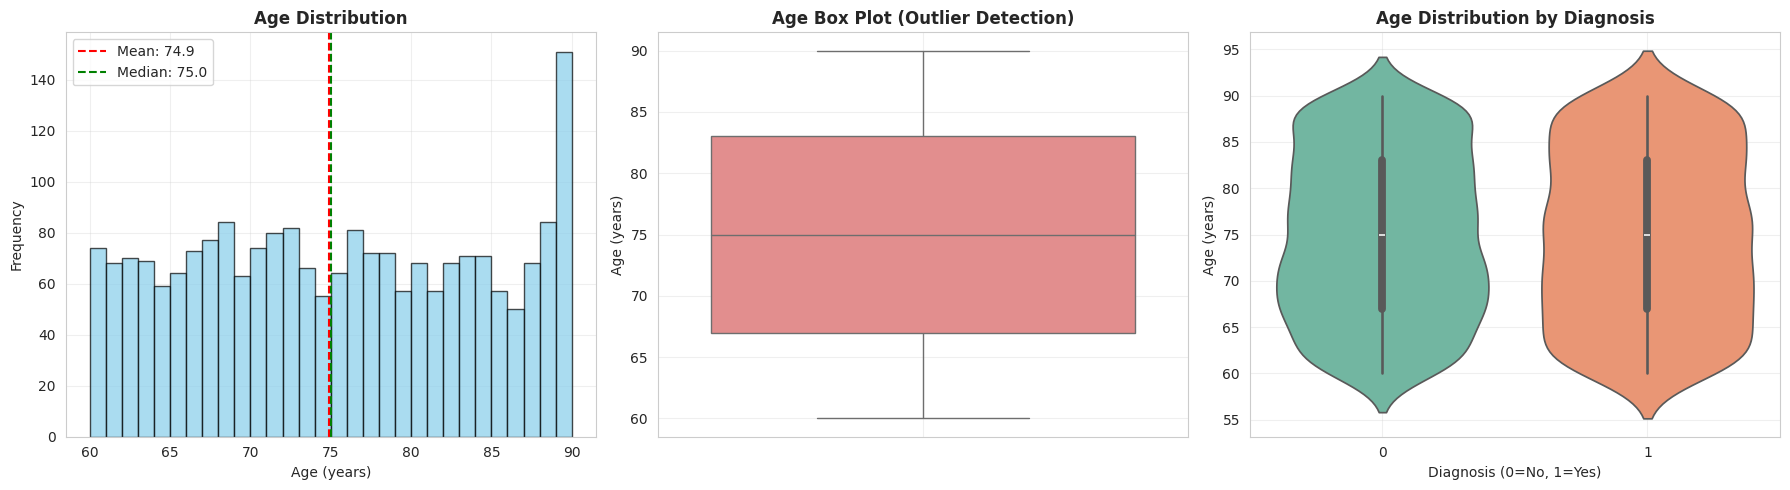


 Age Group Distribution (for Association Rules):
Age_Group
60-70    701
70-80    697
80-90    677
Name: count, dtype: int64

 Key Statistics:
   Mean age: 74.9 years
   Median age: 75.0 years
   Std deviation: 9.0 years


In [9]:
print(" AGE DISTRIBUTION ANALYSIS")

if 'Age' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Histogram
    axes[0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].axvline(df['Age'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df['Age'].mean():.1f}')
    axes[0].axvline(df['Age'].median(), color='green', linestyle='--',
                   label=f'Median: {df['Age'].median():.1f}')
    axes[0].set_xlabel('Age (years)')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Age Distribution', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Box plot
    sns.boxplot(y=df['Age'], ax=axes[1], color='lightcoral')
    axes[1].set_ylabel('Age (years)')
    axes[1].set_title('Age Box Plot (Outlier Detection)', fontweight='bold')
    axes[1].grid(alpha=0.3)

    # Age by Diagnosis (if diagnosis exists)
    if diagnosis_col:
        sns.violinplot(data=df, x=diagnosis_col, y='Age', palette='Set2', ax=axes[2])
        axes[2].set_xlabel('Diagnosis (0=No, 1=Yes)')
        axes[2].set_ylabel('Age (years)')
        axes[2].set_title('Age Distribution by Diagnosis', fontweight='bold')
        axes[2].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Create age groups for association rules (as mentioned in proposal)
    df['Age_Group'] = pd.cut(df['Age'], bins=[60, 70, 80, 90],
                             labels=['60-70', '70-80', '80-90'])

    print("\n Age Group Distribution (for Association Rules):")
    print(df['Age_Group'].value_counts().sort_index())

    print(f"\n Key Statistics:")
    print(f"   Mean age: {df['Age'].mean():.1f} years")
    print(f"   Median age: {df['Age'].median():.1f} years")
    print(f"   Std deviation: {df['Age'].std():.1f} years")


STEP 10: MMSE SCORE ANALYSIS - CRITICAL COGNITIVE MEASURE

 MMSE (COGNITIVE ASSESSMENT) ANALYSIS


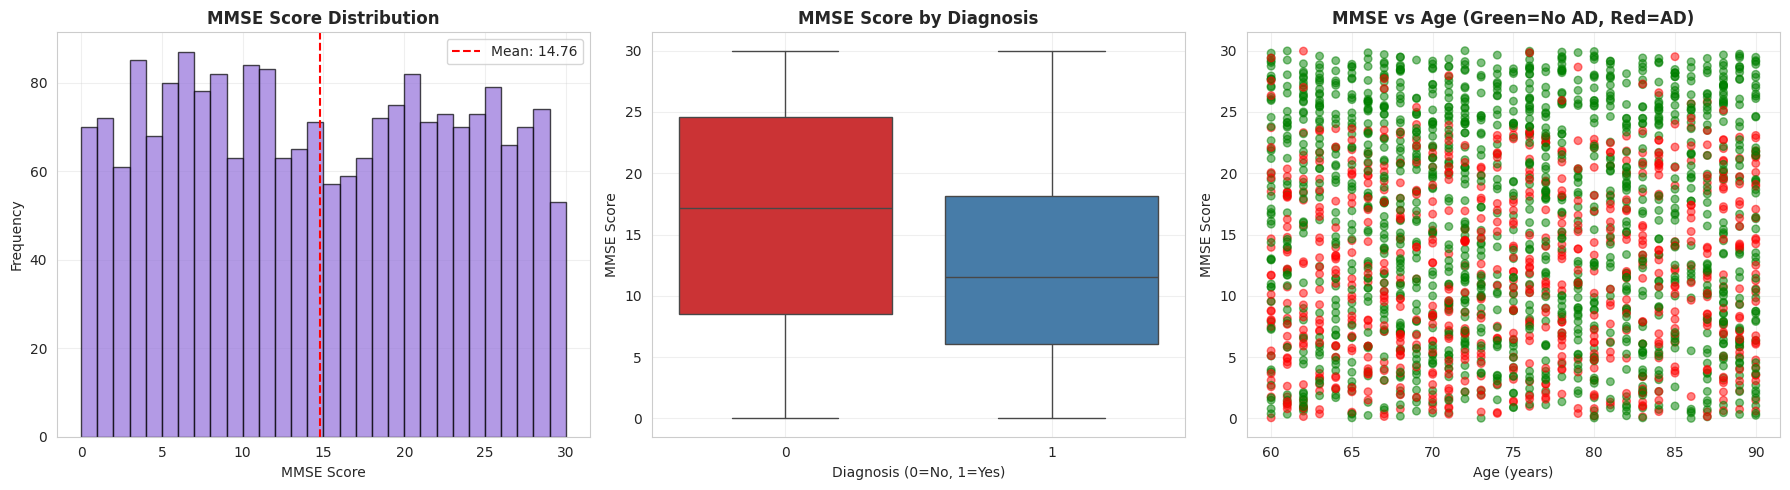


 MMSE correlation with Diagnosis: -0.237
   Moderate correlation

 MMSE Statistics by Diagnosis:


,mean,median,std,min,max
Diagnosis,,,,,
0,16.27,17.15,8.93,0.01,29.99
1,11.99,11.57,7.23,0.05,29.96


In [10]:
print(" MMSE (COGNITIVE ASSESSMENT) ANALYSIS")

if 'MMSE' in df.columns and diagnosis_col:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Distribution
    axes[0].hist(df['MMSE'], bins=30, color='mediumpurple', edgecolor='black', alpha=0.7)
    axes[0].axvline(df['MMSE'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df['MMSE'].mean():.2f}')
    axes[0].set_xlabel('MMSE Score')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('MMSE Score Distribution', fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # Box plot by diagnosis
    sns.boxplot(data=df, x=diagnosis_col, y='MMSE', palette='Set1', ax=axes[1])
    axes[1].set_xlabel('Diagnosis (0=No, 1=Yes)')
    axes[1].set_ylabel('MMSE Score')
    axes[1].set_title('MMSE Score by Diagnosis', fontweight='bold')
    axes[1].grid(alpha=0.3)

    # Scatter plot with diagnosis
    colors = ['green' if d == 0 else 'red' for d in df[diagnosis_col]]
    axes[2].scatter(df['Age'], df['MMSE'], c=colors, alpha=0.5, s=30)
    axes[2].set_xlabel('Age (years)')
    axes[2].set_ylabel('MMSE Score')
    axes[2].set_title('MMSE vs Age (Green=No AD, Red=AD)', fontweight='bold')
    axes[2].grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Calculate correlation with diagnosis
    correlation = df['MMSE'].corr(df[diagnosis_col])
    print(f"\n MMSE correlation with Diagnosis: {correlation:.3f}")
    print(f"   {'Strong negative correlation!' if abs(correlation) > 0.5 else 'Moderate correlation'}")

    # Group statistics
    print("\n MMSE Statistics by Diagnosis:")
    mmse_stats = df.groupby(diagnosis_col)['MMSE'].agg(['mean', 'median', 'std', 'min', 'max'])
    display(mmse_stats.round(2))


STEP 11: CORRELATION ANALYSIS

 CORRELATION ANALYSIS

 TOP 10 CORRELATIONS WITH DIAGNOSIS:
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
Name: Diagnosis, dtype: float64

 STRONGEST NEGATIVE CORRELATIONS (Protective Factors):
EducationLevel         -0.043966
SleepQuality           -0.056548
MMSE                   -0.237126
ADL                    -0.332346
FunctionalAssessment   -0.364898
Name: Diagnosis, dtype: float64


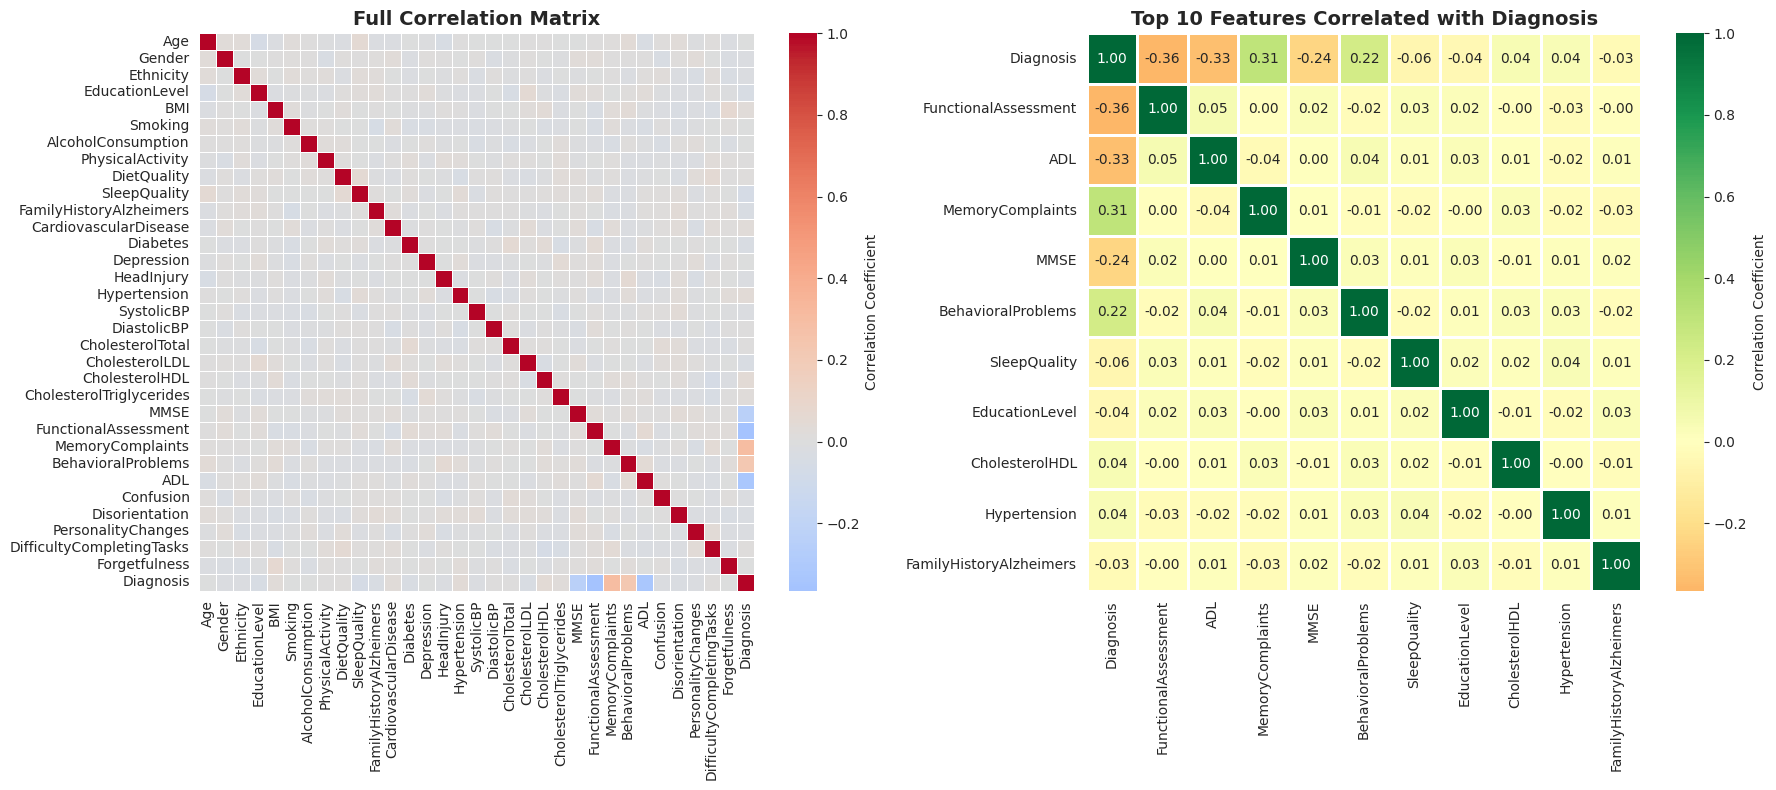

In [11]:
print(" CORRELATION ANALYSIS")

# Select numeric columns for correlation (excluding ID if present)
corr_cols = [col for col in numeric_cols if col not in ['PatientID', 'DoctorInCharge']]
corr_matrix = df[corr_cols].corr()

# Find top correlations with Diagnosis
if diagnosis_col in corr_cols:
    diagnosis_corr = corr_matrix[diagnosis_col].sort_values(ascending=False)

    print("\n TOP 10 CORRELATIONS WITH DIAGNOSIS:")
    print(diagnosis_corr.head(11)[1:])  # Exclude self-correlation

    print("\n STRONGEST NEGATIVE CORRELATIONS (Protective Factors):")
    print(diagnosis_corr.tail(5))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Full correlation heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0,
            linewidths=0.5, annot=False, fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'}, ax=axes[0])
axes[0].set_title('Full Correlation Matrix', fontsize=14, fontweight='bold')

# Top correlations with diagnosis
if diagnosis_col in corr_cols:
    top_features = diagnosis_corr.abs().sort_values(ascending=False)[1:11].index
    top_corr = df[[diagnosis_col] + list(top_features)].corr()

    sns.heatmap(top_corr, annot=True, fmt='.2f', cmap='RdYlGn',
                center=0, linewidths=1, ax=axes[1],
                cbar_kws={'label': 'Correlation Coefficient'})
    axes[1].set_title('Top 10 Features Correlated with Diagnosis',
                     fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

STEP 12: LIFESYLE FACTORS ANALYSIS - HALEE SECTION

 LIFESTYLE FACTORS ANALYSIS

Lifestyle variables found: ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality']



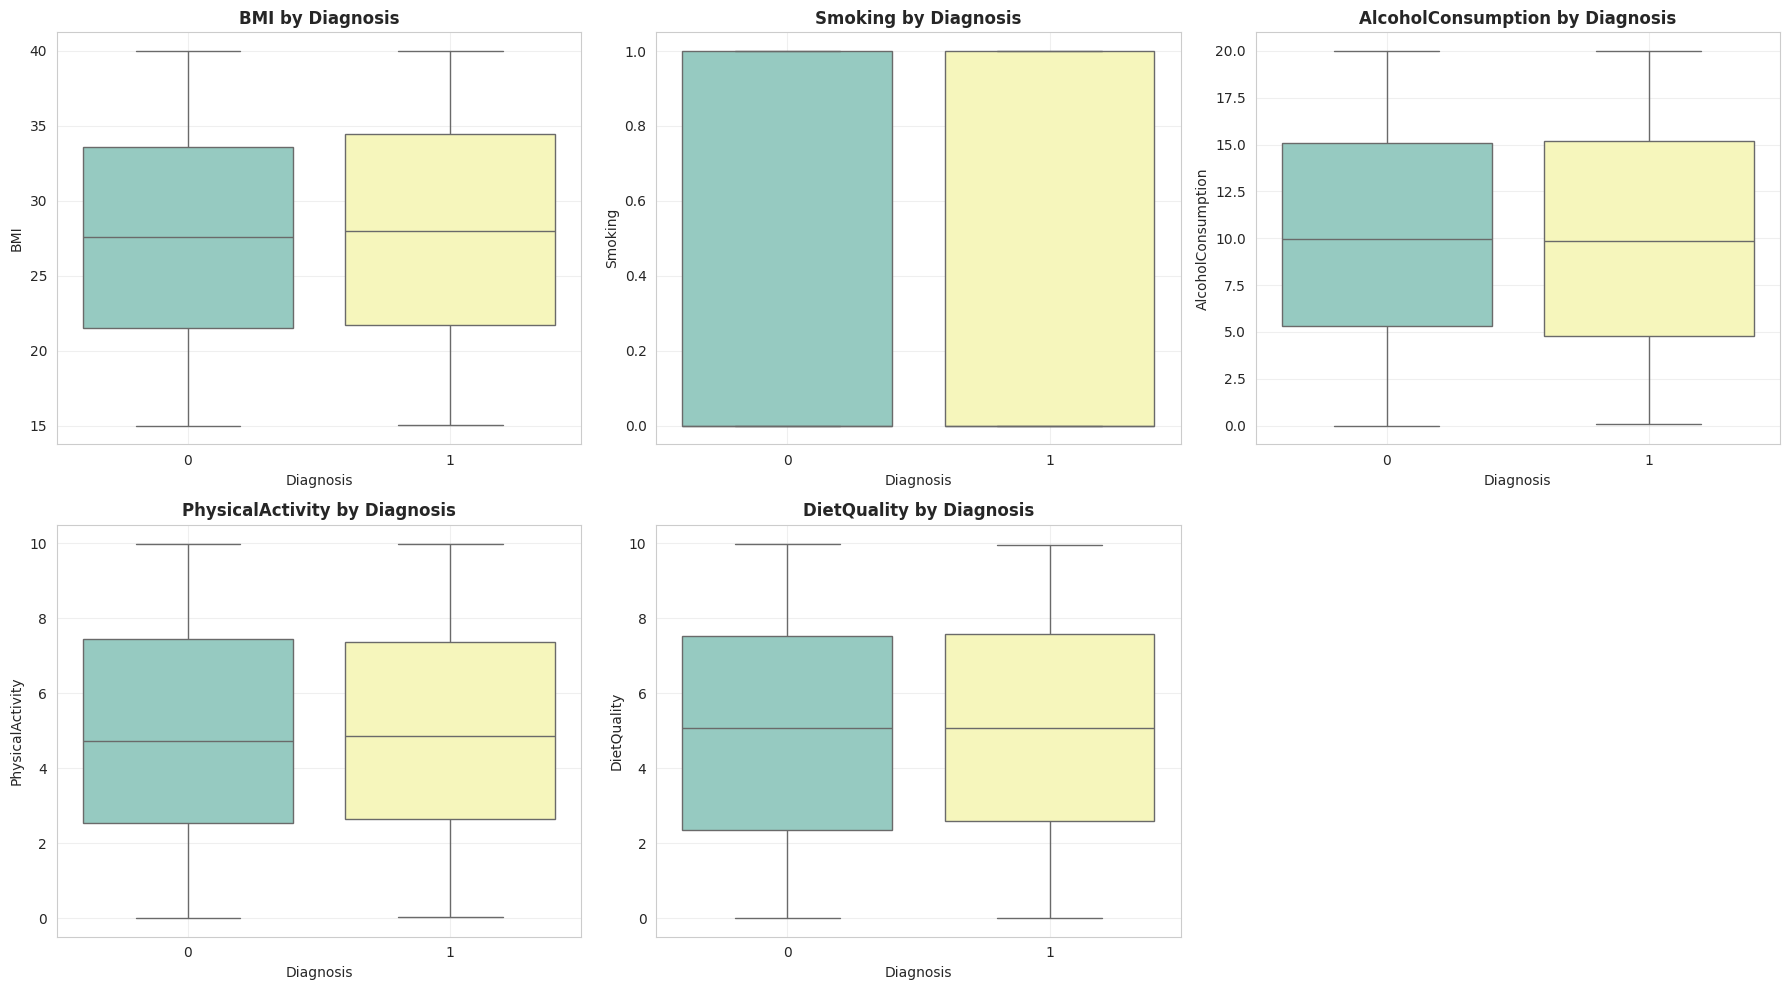

In [12]:
print(" LIFESTYLE FACTORS ANALYSIS")

lifestyle_cols = [col for col in df.columns if any(keyword in col.lower()
                  for keyword in ['bmi', 'smoking', 'alcohol', 'physical', 'diet', 'exercise'])]

if lifestyle_cols:
    print(f"\nLifestyle variables found: {lifestyle_cols}\n")

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()

    for idx, col in enumerate(lifestyle_cols[:6]):  # Plot first 6
        if df[col].dtype in ['int64', 'float64']:
            # Numeric lifestyle factor
            if diagnosis_col:
                sns.boxplot(data=df, x=diagnosis_col, y=col, palette='Set3', ax=axes[idx])
                axes[idx].set_title(f'{col} by Diagnosis', fontweight='bold')
            else:
                axes[idx].hist(df[col], bins=20, color='lightgreen', edgecolor='black')
                axes[idx].set_title(f'{col} Distribution', fontweight='bold')
        else:
            # Categorical lifestyle factor
            df[col].value_counts().plot(kind='bar', ax=axes[idx], color='lightblue')
            axes[idx].set_title(f'{col} Distribution', fontweight='bold')
            axes[idx].set_xlabel(col)

        axes[idx].grid(alpha=0.3)

    # Hide extra subplots
    for idx in range(len(lifestyle_cols), 6):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

STEP 13: CLINICAL MEASUREMENTS ANALYSIS - FEDI SECTION

 CLINICAL MEASUREMENTS ANALYSIS

Clinical variables found: ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']

 Clinical Measurements Summary:


,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
count,2149.00,2149.00,2149.00,2149.00,2149.00,2149.00
mean,134.26,89.85,225.20,124.34,59.46,228.28
std,25.95,17.59,42.54,43.37,23.14,101.99
min,90.00,60.00,150.09,50.23,20.00,50.41
25%,112.00,74.00,190.25,87.20,39.10,137.58
50%,134.00,91.00,225.09,123.34,59.77,230.30
75%,157.00,105.00,262.03,161.73,78.94,314.84
max,179.00,119.00,299.99,199.97,99.98,399.94


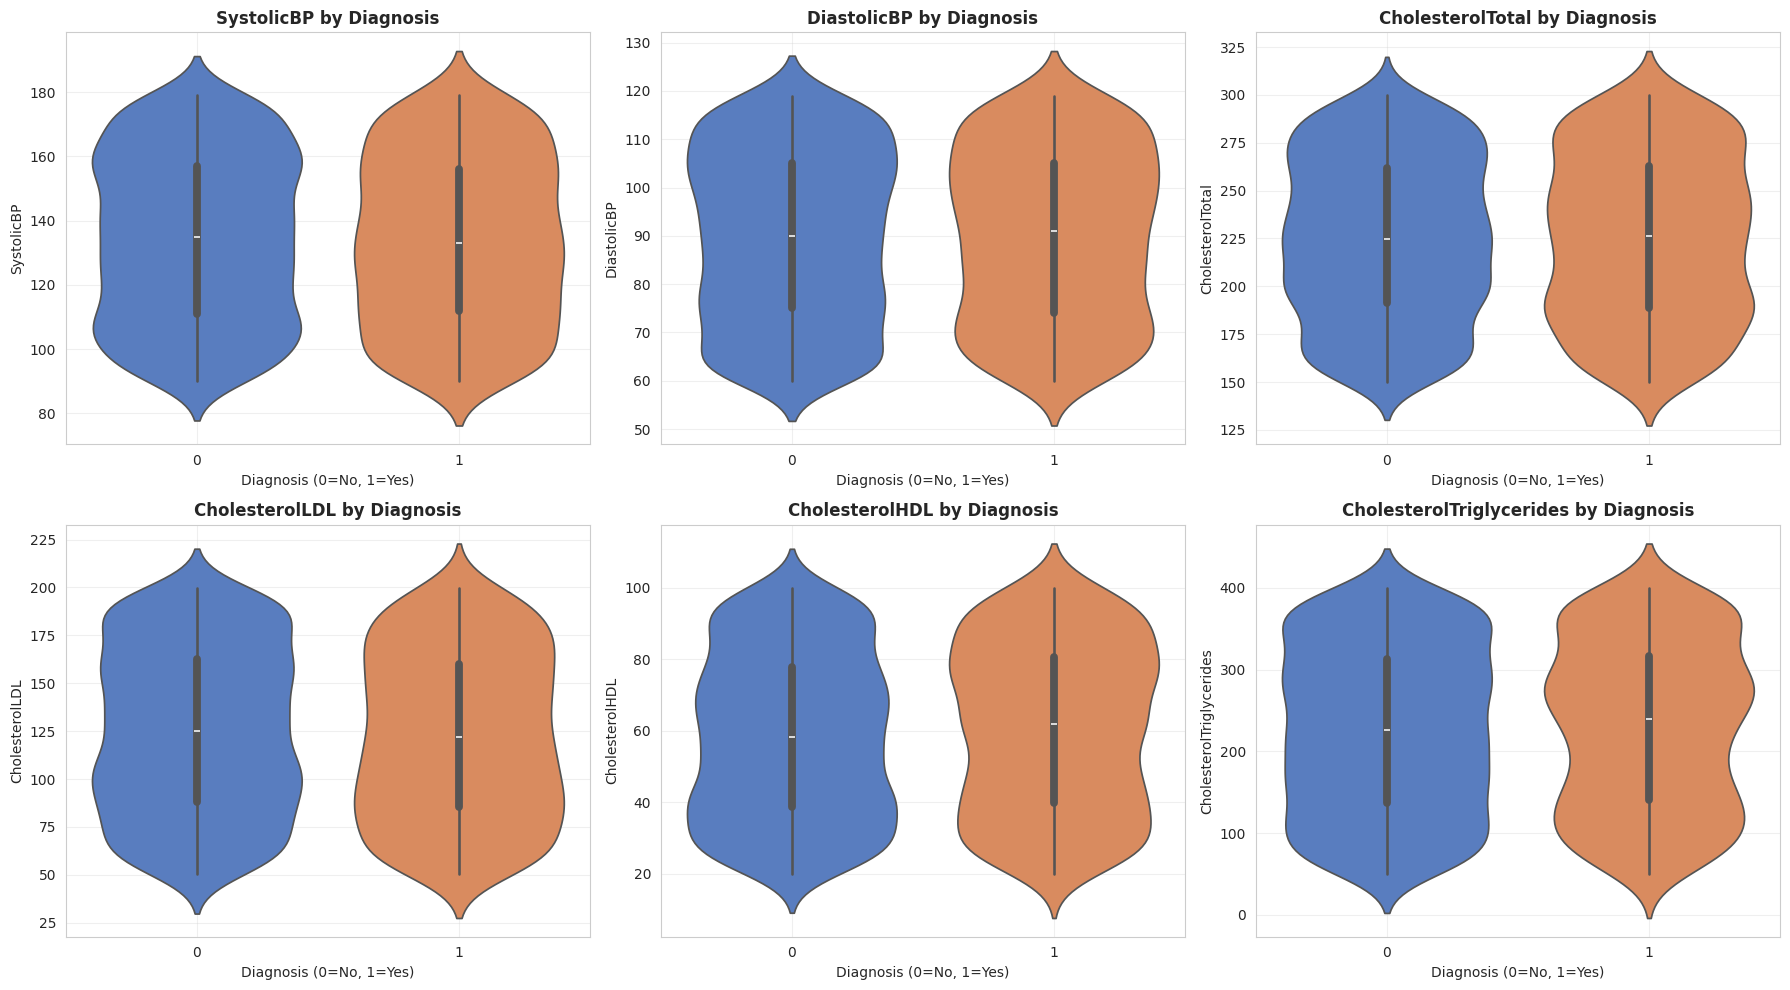


  Missing Values in Clinical Measurements:
  No missing values in clinical measurements!


In [13]:
print(" CLINICAL MEASUREMENTS ANALYSIS")

clinical_cols = [col for col in df.columns if any(keyword in col.lower()
                 for keyword in ['blood', 'pressure', 'cholesterol', 'systolic',
                                'diastolic', 'ldl', 'hdl', 'triglycerides'])]

if clinical_cols:
    print(f"\nClinical variables found: {clinical_cols}\n")

    # Statistical summary
    print(" Clinical Measurements Summary:")
    display(df[clinical_cols].describe().round(2))

    # Visualizations
    n_plots = len(clinical_cols)
    n_rows = (n_plots + 2) // 3
    fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))
    axes = axes.ravel() if n_plots > 1 else [axes]

    for idx, col in enumerate(clinical_cols):
        if diagnosis_col and df[col].dtype in ['int64', 'float64']:
            sns.violinplot(data=df, x=diagnosis_col, y=col, palette='muted', ax=axes[idx])
            axes[idx].set_title(f'{col} by Diagnosis', fontweight='bold')
            axes[idx].set_xlabel('Diagnosis (0=No, 1=Yes)')
        axes[idx].grid(alpha=0.3)

    # Hide extra subplots
    for idx in range(len(clinical_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

    # Check for missing values in clinical measurements
    print("\n  Missing Values in Clinical Measurements:")
    clinical_missing = df[clinical_cols].isnull().sum()
    clinical_missing = clinical_missing[clinical_missing > 0]
    if len(clinical_missing) > 0:
        for col, count in clinical_missing.items():
            pct = (count / len(df)) * 100
            print(f"   {col}: {count} ({pct:.2f}%)")
    else:
        print("  No missing values in clinical measurements!")

STEP 14: KEY FINDINGS SUMMARY - JHANSI

In [14]:
print(" KEY FINDINGS SUMMARY FOR PROGRESS REPORT")

print("\n MAJOR FINDINGS:")

# Finding 1: Class imbalance
if diagnosis_col:
    diagnosis_pct = df[diagnosis_col].value_counts(normalize=True) * 100
    positive_class = diagnosis_pct[1]
    negative_class = diagnosis_pct[0]
    print(f"   1. Class Imbalance: {negative_class:.1f}% not diagnosed, "
          f"{positive_class:.1f}% diagnosed")
    print(f"      → Requires stratified sampling in train-test split")

# Finding 2: Top correlations
if diagnosis_col and 'MMSE' in df.columns:
    mmse_corr = df['MMSE'].corr(df[diagnosis_col])
    print(f"   2. MMSE shows strongest correlation with Diagnosis (r={mmse_corr:.3f})")
    print(f"      → Lower MMSE scores strongly associated with Alzheimer's")

# Finding 3: Missing values
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    missing_pct = (total_missing / (df.shape[0] * df.shape[1])) * 100
    print(f"   3. Missing Values: {total_missing:,} total ({missing_pct:.2f}% of dataset)")
    print(f"      → Requires imputation strategy before modeling")
else:
    print(f"   3. No missing values detected")

# Finding 4: Age groups
if 'Age_Group' in df.columns:
    age_dist = df['Age_Group'].value_counts(normalize=True) * 100
    print(f"   4. Age Distribution: Most patients in {age_dist.idxmax()} age group ({age_dist.max():.1f}%)")

print("\n  DATA QUALITY ISSUES IDENTIFIED:")
issues_found = False

# Check BMI outliers
if 'BMI' in df.columns:
    bmi_outliers = len(df[(df['BMI'] < 15) | (df['BMI'] > 40)])
    if bmi_outliers > 0:
        print(f"   • {bmi_outliers} patients with BMI outside normal range (15-40)")
        issues_found = True

# Check clinical missing values
if clinical_cols:
    clinical_missing = df[clinical_cols].isnull().sum()
    if clinical_missing.any():
        max_missing_col = clinical_missing.idxmax()
        max_missing_pct = (clinical_missing.max() / len(df)) * 100
        print(f"   • {max_missing_pct:.1f}% missing values in {max_missing_col}")
        issues_found = True

if not issues_found:
    print("   • No major data quality issues detected!")


 KEY FINDINGS SUMMARY FOR PROGRESS REPORT

 MAJOR FINDINGS:
   1. Class Imbalance: 64.6% not diagnosed, 35.4% diagnosed
      → Requires stratified sampling in train-test split
   2. MMSE shows strongest correlation with Diagnosis (r=-0.237)
      → Lower MMSE scores strongly associated with Alzheimer's
   3. Missing Values: 74 total (0.10% of dataset)
      → Requires imputation strategy before modeling
   4. Age Distribution: Most patients in 60-70 age group (33.8%)

  DATA QUALITY ISSUES IDENTIFIED:
   • No major data quality issues detected!


STEP 15: Save Processed Data

In [15]:
# Save the data with age groups added
output_file = 'alzheimers_data_with_age_groups.csv'
df.to_csv(output_file, index=False)
print(f"\n Processed data saved to: {output_file}")
print(f"   Added columns: Age_Group (for association rules)")

# Also save a summary report
summary_file = 'eda_summary.txt'
with open(summary_file, 'w') as f:
    f.write("ALZHEIMER'S DISEASE EDA SUMMARY\n")
    f.write(f"Dataset: {df.shape[0]} patients, {df.shape[1]} features\n")
    f.write(f"Missing values: {df.isnull().sum().sum()}\n")
    if diagnosis_col:
        f.write(f"\nDiagnosis distribution:\n{df[diagnosis_col].value_counts()}\n")

print(f" Summary report saved to: {summary_file}")
print("\n EDA Complete! Review findings for report.")
print("\n Jhansi will organize github")


 Processed data saved to: alzheimers_data_with_age_groups.csv
   Added columns: Age_Group (for association rules)
 Summary report saved to: eda_summary.txt

 EDA Complete! Review findings for report.

 Jhansi will organize github


**PREPROCESSING PIPELINE

In [16]:
"""
CONTINUATION: Weeks 2-4 Implementation
Building on completed EDA to achieve objectives
"""

'\nCONTINUATION: Weeks 2-4 Implementation\nBuilding on completed EDA to achieve objectives\n'

In [17]:
print("DATA PREPROCESSING PIPELINE")

# Load the processed data
df = pd.read_csv('alzheimers_data_with_age_groups.csv')

print("\n Loaded data with Age_Group column")
print(f"  Shape: {df.shape}")

# STEP 1: Handle Missing Values
print("STEP 1: MISSING VALUE IMPUTATION")

# Check for any missing values
missing_summary = df.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]

if len(missing_cols) > 0:
    print(f"\n  Found {missing_cols.sum()} missing values across {len(missing_cols)} columns")

    # Imputation strategy
    from sklearn.impute import SimpleImputer

    # For numeric columns: median imputation
    numeric_cols_with_missing = missing_cols[missing_cols.index.isin(
        df.select_dtypes(include=[np.number]).columns
    )].index.tolist()

    if numeric_cols_with_missing:
        print(f"\nApplying median imputation to: {numeric_cols_with_missing}")
        imputer = SimpleImputer(strategy='median')
        df[numeric_cols_with_missing] = imputer.fit_transform(df[numeric_cols_with_missing])

    print(" Missing value imputation complete")
else:
    print("\n No missing values found - dataset is complete!")

DATA PREPROCESSING PIPELINE

 Loaded data with Age_Group column
  Shape: (2149, 36)
STEP 1: MISSING VALUE IMPUTATION

  Found 74 missing values across 1 columns
 Missing value imputation complete


STEP 2: Feature Discretization for Association Rules

In [18]:
print("STEP 2: DISCRETIZING CONTINUOUS VARIABLES")
print("Creating categorical bins for Apriori algorithm...")

# BMI Categories
df['BMI_Category'] = pd.cut(df['BMI'],
                            bins=[15, 18.5, 25, 30, 40],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Cholesterol Categories (using clinical thresholds)
df['Cholesterol_Category'] = pd.cut(df['CholesterolTotal'],
                                     bins=[0, 200, 240, 300],
                                     labels=['Desirable', 'Borderline', 'High'])

# MMSE Score Categories (cognitive function levels)
df['MMSE_Category'] = pd.cut(df['MMSE'],
                              bins=[0, 17, 24, 30],
                              labels=['Severe_Impairment', 'Mild_Impairment', 'Normal'])

# Blood Pressure Categories
df['BP_Category'] = pd.cut(df['SystolicBP'],
                           bins=[0, 120, 140, 180],
                           labels=['Normal', 'Elevated', 'High'])

# Physical Activity Categories
df['Activity_Level'] = pd.cut(df['PhysicalActivity'],
                               bins=[0, 3, 7, 10],
                               labels=['Low', 'Moderate', 'High'])

print("\n Created 5 discretized features:")
print("  • BMI_Category (4 levels)")
print("  • Cholesterol_Category (3 levels)")
print("  • MMSE_Category (3 levels)")
print("  • BP_Category (3 levels)")
print("  • Activity_Level (3 levels)")

# Display distribution
print("\n Discretized Variable Distributions:")
for col in ['BMI_Category', 'Cholesterol_Category', 'MMSE_Category', 'BP_Category', 'Activity_Level']:
    print(f"\n{col}:")
    print(df[col].value_counts())


STEP 2: DISCRETIZING CONTINUOUS VARIABLES
Creating categorical bins for Apriori algorithm...

 Created 5 discretized features:
  • BMI_Category (4 levels)
  • Cholesterol_Category (3 levels)
  • MMSE_Category (3 levels)
  • BP_Category (3 levels)
  • Activity_Level (3 levels)

 Discretized Variable Distributions:

BMI_Category:
BMI_Category
Obese          871
Normal         544
Overweight     437
Underweight    297
Name: count, dtype: int64

Cholesterol_Category:
Cholesterol_Category
High          851
Desirable     698
Borderline    600
Name: count, dtype: int64

MMSE_Category:
MMSE_Category
Severe_Impairment    1228
Mild_Impairment       506
Normal                415
Name: count, dtype: int64

BP_Category:
BP_Category
High        921
Normal      748
Elevated    480
Name: count, dtype: int64

Activity_Level:
Activity_Level
Moderate    866
Low         656
High        627
Name: count, dtype: int64


STEP 3: Feature Scaling for Clustering

In [19]:
print("STEP 3: FEATURE NORMALIZATION FOR CLUSTERING")

from sklearn.preprocessing import StandardScaler

# Select features for clustering (numeric only, exclude IDs)
clustering_features = [
    'Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL',
    'CholesterolHDL', 'MMSE', 'FunctionalAssessment', 'ADL'
]

# Create scaled version for clustering
scaler = StandardScaler()
df_scaled = df[clustering_features].copy()
df_scaled_values = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled_values, columns=clustering_features, index=df.index)

print(f"\n Scaled {len(clustering_features)} features using z-score normalization")
print("\n Sample of scaled data:")
display(df_scaled.head())

print("\n Verification - Scaled data should have mean≈0, std≈1:")
print(df_scaled.describe().loc[['mean', 'std']].round(3))

STEP 3: FEATURE NORMALIZATION FOR CLUSTERING

 Scaled 13 features using z-score normalization

 Sample of scaled data:


,Age,BMI,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,MMSE,FunctionalAssessment,ADL
0,-0.212368,-0.655225,0.492525,-1.253593,1.119918,0.298159,-1.014750,0.403677,-1.572661,-1.114429,0.779037,0.497506,-1.104434
1,1.567757,-0.114751,0.945093,-1.538442,0.056836,-0.742572,-1.469595,0.140248,1.593119,0.845730,0.680297,0.704907,-0.810601
2,-0.212368,-1.366428,1.023896,-1.088855,1.487380,-1.359301,1.486898,1.386812,0.668569,0.445615,-0.859222,0.281813,0.724491
3,-0.101111,0.851625,1.227995,0.839804,0.760833,-0.626935,1.430043,-1.542715,-1.360103,0.388780,-0.088723,1.343346,0.508044
4,1.567757,-0.961607,0.486696,-1.443293,-0.824566,-1.552029,1.543754,0.291653,-0.725756,-0.111924,-0.143712,0.333665,-1.684679



 Verification - Scaled data should have mean≈0, std≈1:
      Age  BMI  PhysicalActivity  DietQuality  SleepQuality  SystolicBP  \
mean  0.0  0.0              -0.0         -0.0          -0.0        -0.0   
std   1.0  1.0               1.0          1.0           1.0         1.0   

      DiastolicBP  CholesterolTotal  CholesterolLDL  CholesterolHDL  MMSE  \
mean          0.0               0.0            -0.0             0.0  -0.0   
std           1.0               1.0             1.0             1.0   1.0   

      FunctionalAssessment  ADL  
mean                   0.0  0.0  
std                    1.0  1.0  


STEP 4: Train-Test Split with Stratification

In [20]:
print("STEP 4: STRATIFIED TRAIN-TEST SPLIT")

from sklearn.model_selection import train_test_split

# Split with stratification to maintain class balance
X = df.drop(['Diagnosis', 'PatientID', 'DoctorInCharge'] +
            ['Age_Group', 'BMI_Category', 'Cholesterol_Category',
             'MMSE_Category', 'BP_Category', 'Activity_Level'], axis=1, errors='ignore')
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n Split complete:")
print(f"  Training set: {len(X_train)} patients ({len(X_train)/len(df)*100:.1f}%)")
print(f"  Test set: {len(X_test)} patients ({len(X_test)/len(df)*100:.1f}%)")

print(f"\n Class distribution maintained:")
print(f"  Training - Diagnosed: {y_train.sum()} ({y_train.sum()/len(y_train)*100:.1f}%)")
print(f"  Test - Diagnosed: {y_test.sum()} ({y_test.sum()/len(y_test)*100:.1f}%)")


STEP 4: STRATIFIED TRAIN-TEST SPLIT

 Split complete:
  Training set: 1504 patients (70.0%)
  Test set: 645 patients (30.0%)

 Class distribution maintained:
  Training - Diagnosed: 532 (35.4%)
  Test - Diagnosed: 228 (35.3%)


STEP 5: Save Preprocessed Data

In [21]:
print("STEP 5: SAVING PREPROCESSED DATA")

# Save full preprocessed dataset
df.to_csv('alzheimers_preprocessed.csv', index=False)
print(" Saved: alzheimers_preprocessed.csv")

# Save scaled data for clustering
df_scaled.to_csv('alzheimers_scaled_for_clustering.csv', index=False)
print(" Saved: alzheimers_scaled_for_clustering.csv")

# Save train/test splits
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print(" Saved: Train/test split files")


STEP 5: SAVING PREPROCESSED DATA
 Saved: alzheimers_preprocessed.csv
 Saved: alzheimers_scaled_for_clustering.csv
 Saved: Train/test split files


**K-MEANS CLUSTERING ANALYSIS**

In [22]:
print("K-MEANS CLUSTERING IMPLEMENTATION")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA

# Load scaled data
df_scaled = pd.read_csv('alzheimers_scaled_for_clustering.csv')
df_original = pd.read_csv('alzheimers_preprocessed.csv')

print(f"\n Loaded scaled data: {df_scaled.shape}")

K-MEANS CLUSTERING IMPLEMENTATION

 Loaded scaled data: (2149, 13)


STEP 1: ElBOW METHOD ANALYSIS

STEP 1: ELBOW METHOD - Finding Optimal K

Testing K-means for k = 2 to 7...
  k=2: Silhouette=0.059, Davies-Bouldin=3.921
  k=3: Silhouette=0.052, Davies-Bouldin=3.495
  k=4: Silhouette=0.052, Davies-Bouldin=3.266
  k=5: Silhouette=0.051, Davies-Bouldin=3.040
  k=6: Silhouette=0.052, Davies-Bouldin=2.895
  k=7: Silhouette=0.053, Davies-Bouldin=2.753


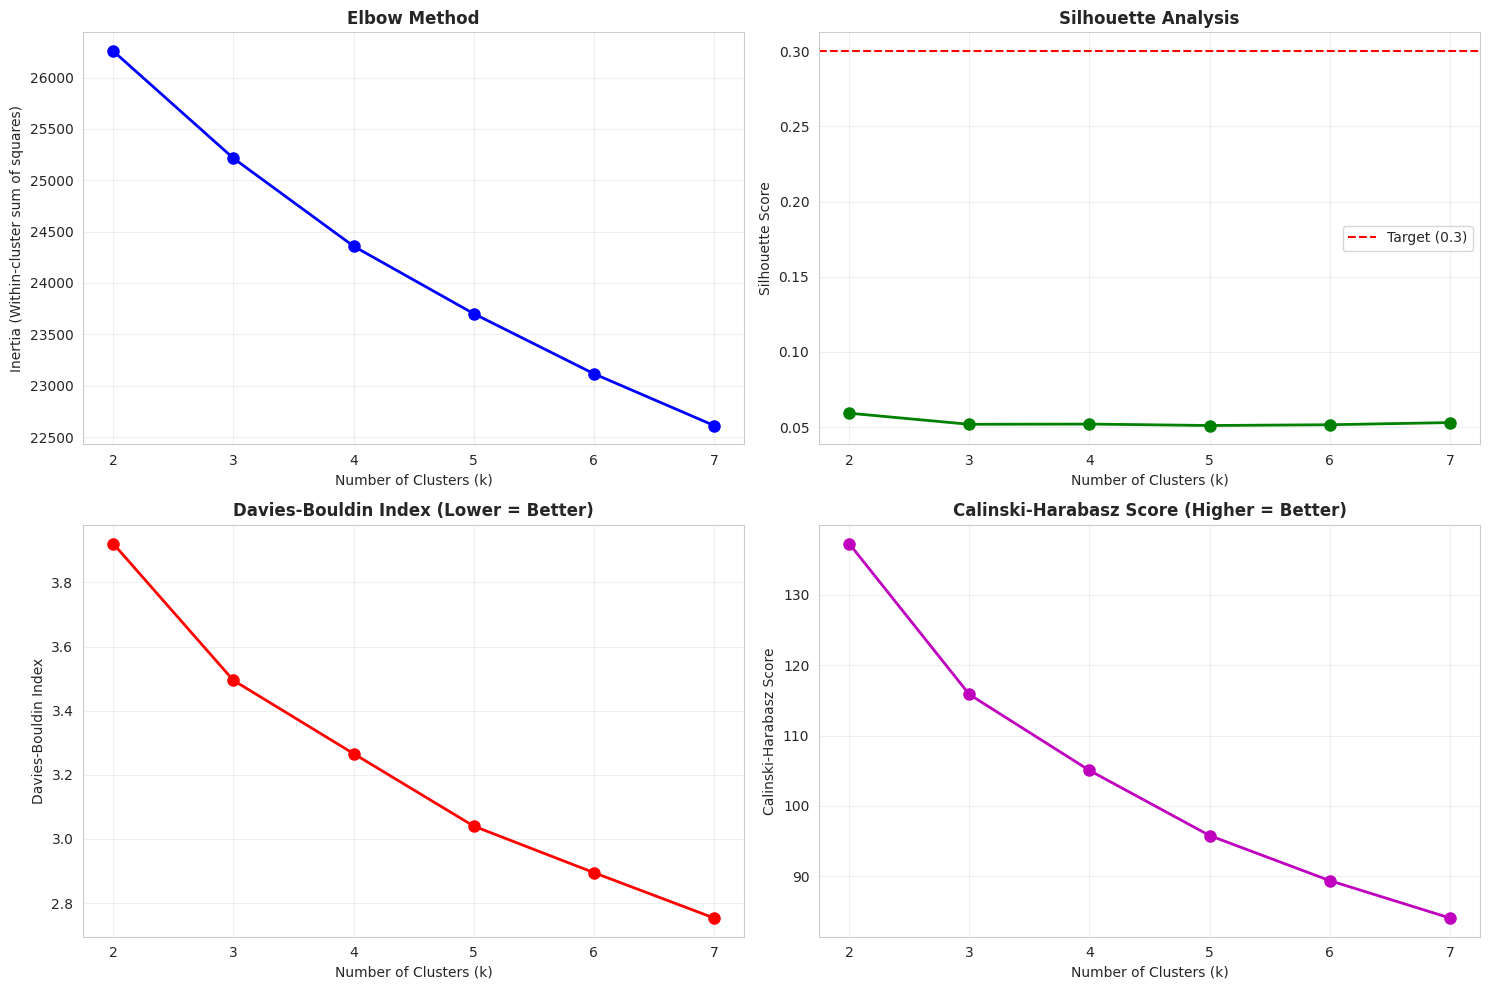


 OPTIMAL K SELECTED: 2 clusters
   Rationale: Highest silhouette score (0.059)


In [23]:
print("STEP 1: ELBOW METHOD - Finding Optimal K")

k_range = range(2, 8)  # Testing k=2 to k=7 per proposal
inertias = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_scores = []

print("\nTesting K-means for k = 2 to 7...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
    davies_bouldin_scores.append(davies_bouldin_score(df_scaled, kmeans.labels_))
    calinski_scores.append(calinski_harabasz_score(df_scaled, kmeans.labels_))

    print(f"  k={k}: Silhouette={silhouette_scores[-1]:.3f}, "
          f"Davies-Bouldin={davies_bouldin_scores[-1]:.3f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Elbow plot
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)')
axes[0, 0].set_ylabel('Inertia (Within-cluster sum of squares)')
axes[0, 0].set_title('Elbow Method', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

# Silhouette scores (higher is better, >0.3 is target)
axes[0, 1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].axhline(y=0.3, color='r', linestyle='--', label='Target (0.3)')
axes[0, 1].set_xlabel('Number of Clusters (k)')
axes[0, 1].set_ylabel('Silhouette Score')
axes[0, 1].set_title('Silhouette Analysis', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Davies-Bouldin (lower is better)
axes[1, 0].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)')
axes[1, 0].set_ylabel('Davies-Bouldin Index')
axes[1, 0].set_title('Davies-Bouldin Index (Lower = Better)', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Calinski-Harabasz (higher is better)
axes[1, 1].plot(k_range, calinski_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)')
axes[1, 1].set_ylabel('Calinski-Harabasz Score')
axes[1, 1].set_title('Calinski-Harabasz Score (Higher = Better)', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Determine optimal k
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\n OPTIMAL K SELECTED: {optimal_k} clusters")
print(f"   Rationale: Highest silhouette score ({max(silhouette_scores):.3f})")


STEP 2: Final K-Means with Optimal K

In [24]:
print(f"STEP 2: FINAL K-MEANS CLUSTERING (k={optimal_k})")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
cluster_labels = kmeans_final.fit_predict(df_scaled)

# Add cluster labels to original dataframe
df_original['Cluster'] = cluster_labels

print(f"\n Clustering complete with k={optimal_k}")
print(f"\n Cluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = count / len(cluster_labels) * 100
    print(f"   Cluster {cluster_id}: {count} patients ({pct:.1f}%)")

STEP 2: FINAL K-MEANS CLUSTERING (k=2)

 Clustering complete with k=2

 Cluster Distribution:
   Cluster 0: 1067 patients (49.7%)
   Cluster 1: 1082 patients (50.3%)


STEP 3: Cluster Profiling

In [25]:
print("STEP 3: CLUSTER PROFILING")

# Calculate mean values for each cluster
profile_features = ['Age', 'BMI', 'MMSE', 'FunctionalAssessment', 'ADL',
                    'PhysicalActivity', 'Diagnosis', 'MemoryComplaints', 'BehavioralProblems']

cluster_profiles = df_original.groupby('Cluster')[profile_features].mean()

print("\n Cluster Profiles (Mean Values):")
display(cluster_profiles.round(2))

# Create interpretable cluster names based on characteristics
print("\n  CLUSTER INTERPRETATIONS:")
for cluster_id in range(optimal_k):
    profile = cluster_profiles.loc[cluster_id]

    # Interpret based on key features
    mmse_level = "High" if profile['MMSE'] > 20 else "Low" if profile['MMSE'] < 15 else "Moderate"
    diagnosis_rate = profile['Diagnosis'] * 100
    age_level = "Older" if profile['Age'] > 78 else "Younger"

    print(f"\nCluster {cluster_id}:")
    print(f"  • Size: {cluster_counts[cluster_id]} patients ({cluster_counts[cluster_id]/len(df_original)*100:.1f}%)")
    print(f"  • Avg Age: {profile['Age']:.1f} years ({age_level})")
    print(f"  • MMSE Score: {profile['MMSE']:.1f} ({mmse_level} cognitive function)")
    print(f"  • Diagnosis Rate: {diagnosis_rate:.1f}%")
    print(f"  • Functional Assessment: {profile['FunctionalAssessment']:.1f}")
    print(f"  • Memory Complaints: {profile['MemoryComplaints']:.2f}")

STEP 3: CLUSTER PROFILING

 Cluster Profiles (Mean Values):


,Age,BMI,MMSE,FunctionalAssessment,ADL,PhysicalActivity,Diagnosis,MemoryComplaints,BehavioralProblems
Cluster,,,,,,,,,
0,74.06,27.22,14.72,5.64,7.50,4.80,0.17,0.19,0.17
1,75.74,28.08,14.79,4.53,2.51,5.04,0.54,0.23,0.15



  CLUSTER INTERPRETATIONS:

Cluster 0:
  • Size: 1067 patients (49.7%)
  • Avg Age: 74.1 years (Younger)
  • MMSE Score: 14.7 (Low cognitive function)
  • Diagnosis Rate: 17.0%
  • Functional Assessment: 5.6
  • Memory Complaints: 0.19

Cluster 1:
  • Size: 1082 patients (50.3%)
  • Avg Age: 75.7 years (Younger)
  • MMSE Score: 14.8 (Low cognitive function)
  • Diagnosis Rate: 53.5%
  • Functional Assessment: 4.5
  • Memory Complaints: 0.23


STEP 4: PCA Visualization

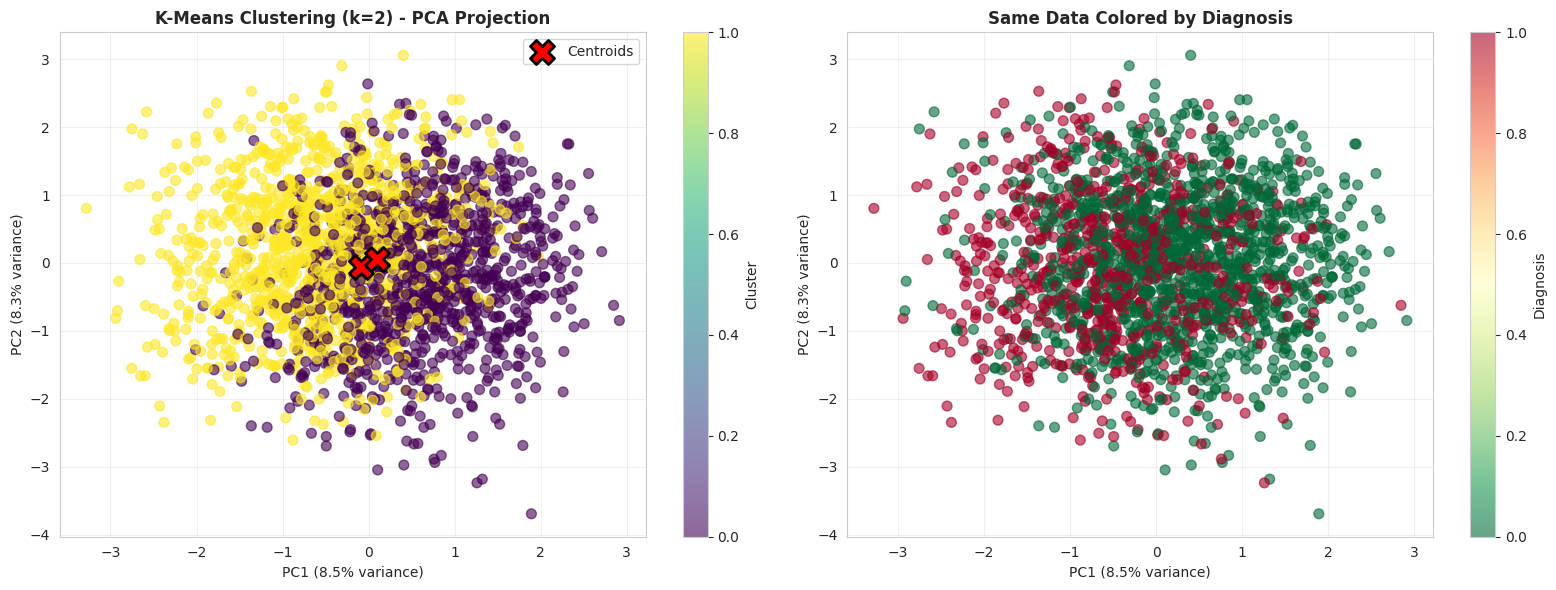


 PCA explains 16.8% of variance in 2D


In [26]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_scaled)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters
scatter1 = axes[0].scatter(pca_components[:, 0], pca_components[:, 1],
                           c=cluster_labels, cmap='viridis', alpha=0.6, s=50)
axes[0].scatter(kmeans_final.cluster_centers_[:, 0],
                kmeans_final.cluster_centers_[:, 1],
                c='red', marker='X', s=300, edgecolors='black', linewidths=2,
                label='Centroids')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[0].set_title(f'K-Means Clustering (k={optimal_k}) - PCA Projection', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: Colored by Diagnosis
scatter2 = axes[1].scatter(pca_components[:, 0], pca_components[:, 1],
                           c=df_original['Diagnosis'], cmap='RdYlGn_r', alpha=0.6, s=50)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[1].set_title('Same Data Colored by Diagnosis', fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Diagnosis')

plt.tight_layout()
plt.show()

print(f"\n PCA explains {sum(pca.explained_variance_ratio_)*100:.1f}% of variance in 2D")

STEP 5: Cluster-Diagnosis Alignment

In [27]:
print("STEP 5: CLUSTER vs DIAGNOSIS ALIGNMENT")

# Crosstab analysis
alignment = pd.crosstab(df_original['Cluster'], df_original['Diagnosis'],
                        normalize='index') * 100

print("\n Diagnosis Rate by Cluster (%):")
display(alignment.round(1))

# Chi-square test
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_original['Cluster'], df_original['Diagnosis'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\n Chi-Square Test for Cluster-Diagnosis Independence:")
print(f"   Chi-square statistic: {chi2:.2f}")
print(f"   P-value: {p_value:.4f}")
if p_value < 0.05:
    print(f"   Clusters are significantly associated with diagnosis (p<0.05)")
else:
    print(f"   Clusters not significantly associated with diagnosis (p≥0.05)")

# Save results
df_original.to_csv('alzheimers_with_clusters.csv', index=False)
print("\n Saved: alzheimers_with_clusters.csv")


print(" K-MEANS CLUSTERING COMPLETE!")

STEP 5: CLUSTER vs DIAGNOSIS ALIGNMENT

 Diagnosis Rate by Cluster (%):


Diagnosis,0,1
Cluster,,
0,83.0,17.0
1,46.5,53.5



 Chi-Square Test for Cluster-Diagnosis Independence:
   Chi-square statistic: 312.35
   P-value: 0.0000
   Clusters are significantly associated with diagnosis (p<0.05)

 Saved: alzheimers_with_clusters.csv
 K-MEANS CLUSTERING COMPLETE!


**HIERARCHICAL CLUSTERING & DENDROGRAMS**

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Load data
df_scaled = pd.read_csv('alzheimers_scaled_for_clustering.csv')
df_original = pd.read_csv('alzheimers_with_clusters.csv')  # Has K-means clusters

print(f"\n Loaded data for hierarchical clustering")


 Loaded data for hierarchical clustering


STEP 1: Hierarchical Clustering with Ward Linkage

In [29]:
# Perform hierarchical clustering
# Use a sample for dendrogram (full dataset too large to visualize clearly)
sample_size = 500
sample_indices = np.random.choice(len(df_scaled), size=sample_size, replace=False)
df_sample = df_scaled.iloc[sample_indices]

print(f"\n Using sample of {sample_size} patients for dendrogram visualization")

# Compute linkage matrix
linkage_matrix = linkage(df_sample, method='ward')

print(" Linkage matrix computed using Ward's method")


 Using sample of 500 patients for dendrogram visualization
 Linkage matrix computed using Ward's method


STEP 2: Dendrogram Visualization

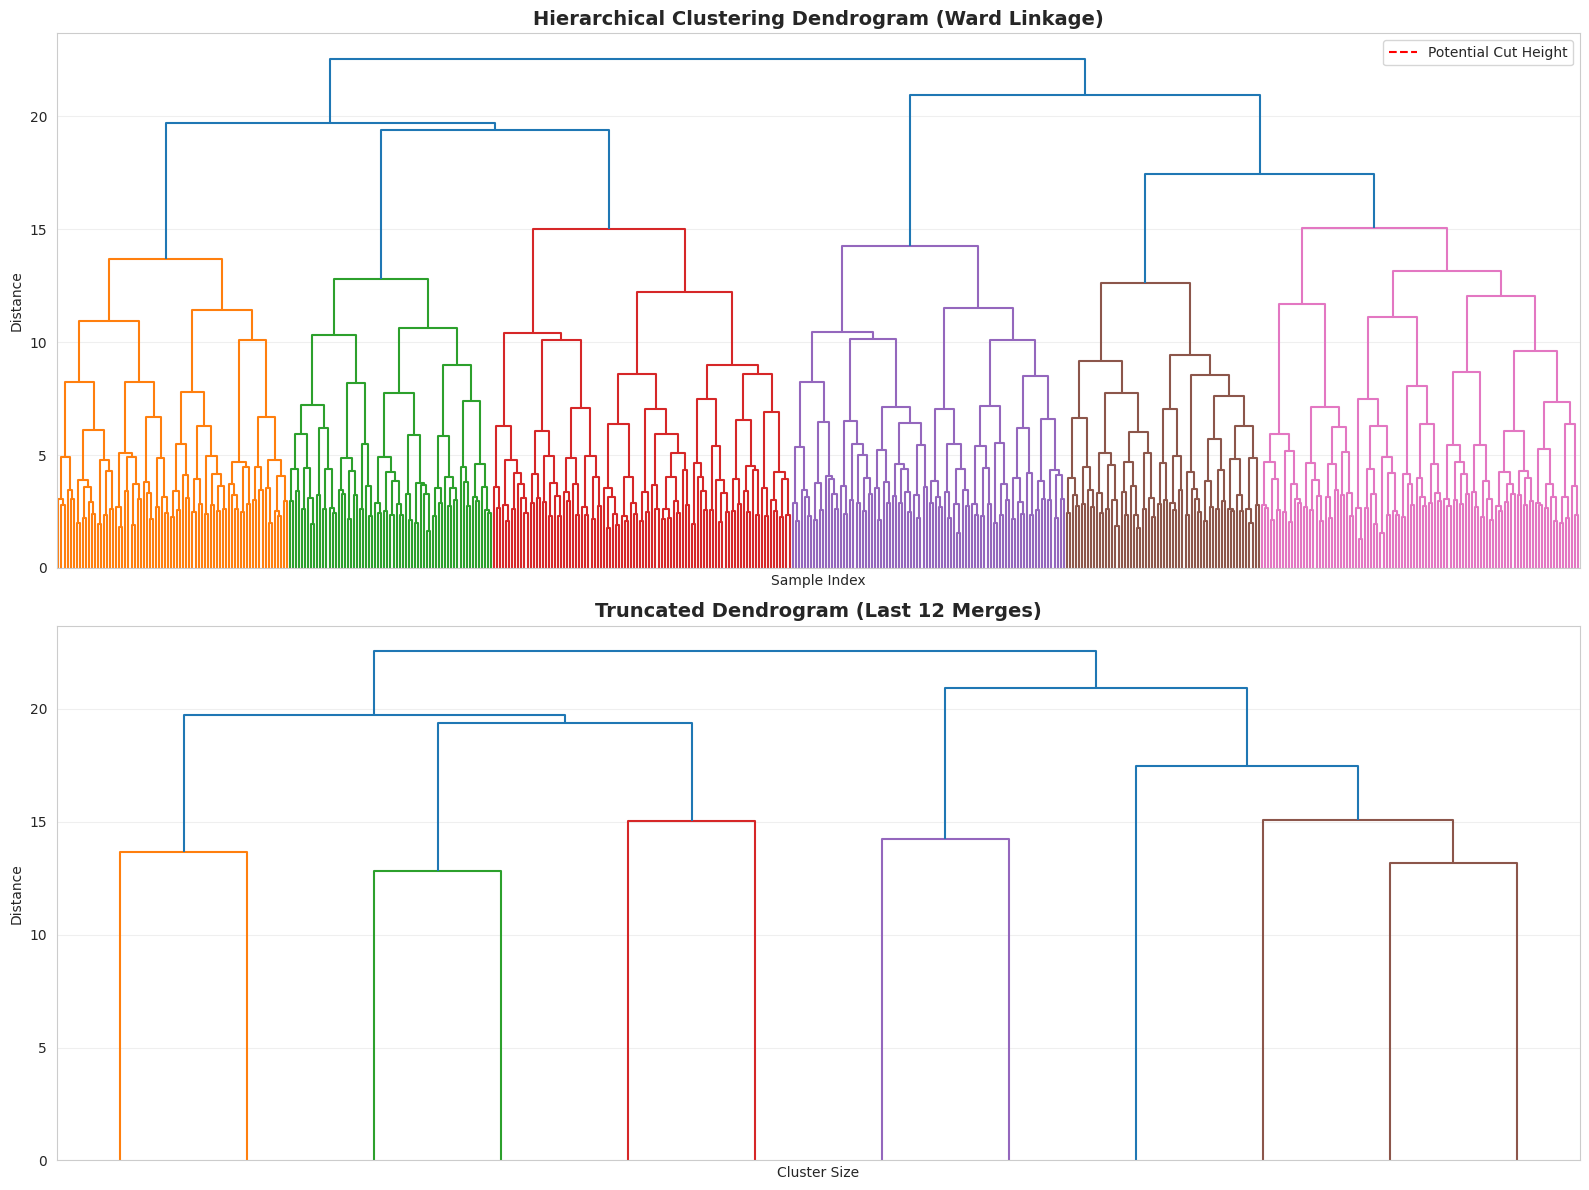

 Dendrogram visualization complete


In [30]:
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Full dendrogram
dendrogram(linkage_matrix, ax=axes[0], no_labels=True)
axes[0].set_title('Hierarchical Clustering Dendrogram (Ward Linkage)',
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Distance')
axes[0].axhline(y=30, color='r', linestyle='--', label='Potential Cut Height')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Truncated dendrogram (show only top levels)
dendrogram(linkage_matrix, ax=axes[1], truncate_mode='lastp', p=12, no_labels=True)
axes[1].set_title('Truncated Dendrogram (Last 12 Merges)',
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster Size')
axes[1].set_ylabel('Distance')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(" Dendrogram visualization complete")

STEP 3: Apply Hierarchical Clustering to Full Dataset

In [31]:
# Use same k as K-means for comparison
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Add to dataframe
df_original['Hierarchical_Cluster'] = hierarchical_labels

print(f"\n Hierarchical clustering complete with k={optimal_k}")
print(f"\n Hierarchical Cluster Distribution:")
hier_counts = pd.Series(hierarchical_labels).value_counts().sort_index()
for cluster_id, count in hier_counts.items():
    pct = count / len(hierarchical_labels) * 100
    print(f"   Cluster {cluster_id}: {count} patients ({pct:.1f}%)")


 Hierarchical clustering complete with k=2

 Hierarchical Cluster Distribution:
   Cluster 0: 1403 patients (65.3%)
   Cluster 1: 746 patients (34.7%)


STEP 4: Compare K-Means vs Hierarchical

In [32]:
# Crosstab comparison
comparison = pd.crosstab(df_original['Cluster'],
                         df_original['Hierarchical_Cluster'],
                         margins=True)

print("\n K-Means vs Hierarchical Cluster Overlap:")
display(comparison)

# Calculate agreement
agreement = np.sum(df_original['Cluster'] == df_original['Hierarchical_Cluster'])
agreement_pct = agreement / len(df_original) * 100
print(f"\n Direct Label Agreement: {agreement_pct:.1f}%")
print("   (Note: Different cluster numbering doesn't mean disagreement)")

# Adjusted Rand Index (better measure)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(df_original['Cluster'], df_original['Hierarchical_Cluster'])
print(f"\n Adjusted Rand Index: {ari:.3f}")
print("   (ARI ranges from -1 to 1, higher means more similar clustering)")


 K-Means vs Hierarchical Cluster Overlap:


Hierarchical_Cluster,0,1,All
Cluster,,,
0,783,284,1067
1,620,462,1082
All,1403,746,2149



 Direct Label Agreement: 57.9%
   (Note: Different cluster numbering doesn't mean disagreement)

 Adjusted Rand Index: 0.025
   (ARI ranges from -1 to 1, higher means more similar clustering)


STEP 5: Hierarchical Cluster Profiles


 Hierarchical Cluster Profiles (Mean Values):


,Age,BMI,MMSE,FunctionalAssessment,ADL,PhysicalActivity,Diagnosis,MemoryComplaints,BehavioralProblems
Hierarchical_Cluster,,,,,,,,,
0,74.36,28.39,13.89,5.20,5.46,4.92,0.34,0.21,0.16
1,75.95,26.27,16.38,4.85,4.08,4.92,0.38,0.21,0.15


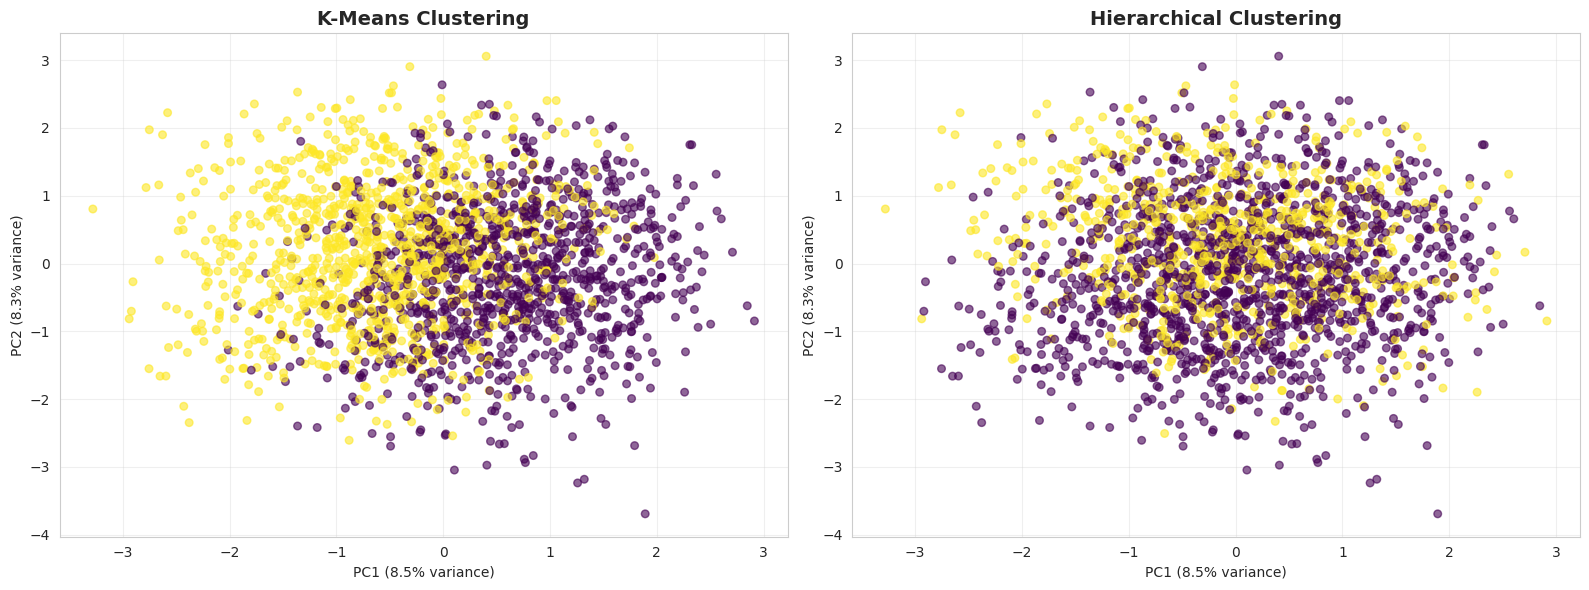


 Saved: alzheimers_final_clustering.csv (includes both clustering results)
 HIERARCHICAL CLUSTERING COMPLETE!

 CLUSTERING SUMMARY:
   • K-Means: 2 clusters (silhouette: 0.059)
   • Hierarchical: 2 clusters (Ward linkage)
   • Agreement (ARI): 0.025
   • Both methods saved in final dataset


In [33]:
hier_profiles = df_original.groupby('Hierarchical_Cluster')[profile_features].mean()

print("\n Hierarchical Cluster Profiles (Mean Values):")
display(hier_profiles.round(2))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means PCA plot
axes[0].scatter(pca_components[:, 0], pca_components[:, 1],
                c=df_original['Cluster'], cmap='viridis', alpha=0.6, s=30)
axes[0].set_title('K-Means Clustering', fontweight='bold', fontsize=14)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[0].grid(alpha=0.3)

# Hierarchical PCA plot
axes[1].scatter(pca_components[:, 0], pca_components[:, 1],
                c=df_original['Hierarchical_Cluster'], cmap='viridis', alpha=0.6, s=30)
axes[1].set_title('Hierarchical Clustering', fontweight='bold', fontsize=14)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Save final results
df_original.to_csv('alzheimers_final_clustering.csv', index=False)
print("\n Saved: alzheimers_final_clustering.csv (includes both clustering results)")

print(" HIERARCHICAL CLUSTERING COMPLETE!")


print("\n CLUSTERING SUMMARY:")
print(f"   • K-Means: {optimal_k} clusters (silhouette: {max(silhouette_scores):.3f})")
print(f"   • Hierarchical: {optimal_k} clusters (Ward linkage)")
print(f"   • Agreement (ARI): {ari:.3f}")
print(f"   • Both methods saved in final dataset")

**STEP 6: ASSOCIATION RULE MINING**

STEP 6: ASSOCIATION RULE MINING

 Discretized columns used: ['Age_Group', 'BMI_Category', 'Cholesterol_Category', 'MMSE_Category', 'BP_Category', 'Activity_Level']

 Binary symptom-like columns used: ['Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

 Transaction matrix shape: (2149, 35)

 Running Apriori with min_support=0.05 ...
 Number of frequent itemsets found: 644
 Total rules generated: 49
 Rules with Diagnosis=1 in consequents and lift >=  1.5 : 9

 Fewer than 20 rules found; lowering min_support to 0.03 ...
 New number of rules (support >= 3%): 39

 TOP ASSOCIATION RULES PREDICTING Diagnosis=1:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,support,confidence,lift
0,"(BP_Category=High, MMSE_Category=Severe_Impair...",(Diagnosis=1),0.037692,0.835052,2.361218
1,"(BMI_Category=Obese, MMSE_Category=Severe_Impa...",(Diagnosis=1),0.042811,0.821429,2.322697
2,"(MMSE_Category=Severe_Impairment, MemoryCompla...",(Diagnosis=1),0.030712,0.814815,2.303996
3,"(Activity_Level=Moderate, MMSE_Category=Severe...",(Diagnosis=1),0.038623,0.798077,2.256668
4,"(MMSE_Category=Severe_Impairment, MemoryCompla...",(Diagnosis=1),0.090740,0.786290,2.223339
5,"(Cholesterol_Category=High, MMSE_Category=Seve...",(Diagnosis=1),0.032573,0.769231,2.175101
6,"(Age_Group=80-90, MemoryComplaints=1, MMSE_Cat...",(Diagnosis=1),0.030712,0.767442,2.170043
7,"(Gender=1, BehavioralProblems=1, MMSE_Category...",(Diagnosis=1),0.030712,0.767442,2.170043
8,"(MemoryComplaints=1, MMSE_Category=Mild_Impair...",(Diagnosis=1),0.039553,0.765766,2.165303
9,"(MMSE_Category=Severe_Impairment, MemoryCompla...",(Diagnosis=1),0.031643,0.764045,2.160438


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



 Summary:
  Total rules predicting Diagnosis=1: 39
  Shown above: top 20 by lift.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


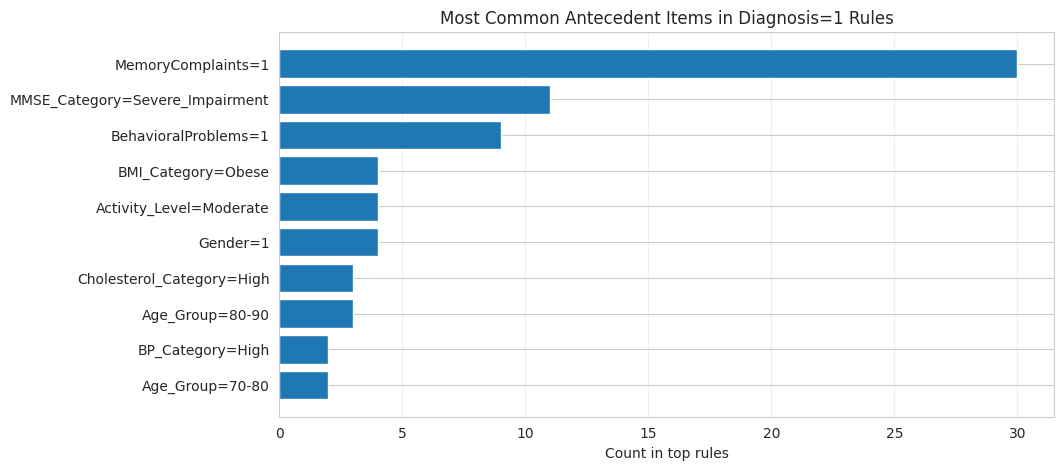

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [34]:
print("STEP 6: ASSOCIATION RULE MINING")

# Install mlxtend
!pip install -q mlxtend

import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Choose discretized features
disc_cols = [
    'Age_Group',
    'BMI_Category',
    'Cholesterol_Category',
    'MMSE_Category',
    'BP_Category',
    'Activity_Level'
]

# 2. Automatically detect binary symptom columns (0/1)
binary_cols = []
for col in df.columns:
    if col in ['Diagnosis']:
        continue
    values = df[col].dropna().unique()
    # simple check for binary 0/1 columns
    if len(values) <= 2 and set(values).issubset({0, 1}):
        binary_cols.append(col)

print("\n Discretized columns used:", disc_cols)
print("\n Binary symptom-like columns used:", binary_cols)

# 3. Build one-hot encoded transactional dataset
transactions = pd.DataFrame()

# One-hot encode discretized categorical features
for col in disc_cols:
    if col in df.columns:
        for val in df[col].dropna().unique():
            col_name = f"{col}={val}"
            transactions[col_name] = (df[col] == val)
    else:
        print(f"Warning: {col} not found in df")

# One-hot encode Diagnosis=1 as the target item
if 'Diagnosis' in df.columns:
    transactions['Diagnosis=1'] = (df['Diagnosis'] == 1)
else:
    raise ValueError("Diagnosis column not found in df; check dataset.")

# One-hot encode binary symptom columns (only the "1" state)
for col in binary_cols:
    col_name = f"{col}=1"
    transactions[col_name] = (df[col] == 1)

print("\n Transaction matrix shape:", transactions.shape)

# 4. Run Apriori with initial thresholds
min_support = 0.05   # 5% support
min_conf = 0.60      # 60% confidence
min_lift = 1.5       # 1.5 lift threshold

print(f"\n Running Apriori with min_support={min_support} ...")
frequent_itemsets = apriori(
    transactions,
    min_support=min_support,
    use_colnames=True
)

print(" Number of frequent itemsets found:", len(frequent_itemsets))

# 5. Generate association rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=min_conf
)

print(" Total rules generated:", len(rules))

# Keep only rules where Diagnosis=1 is in the consequents
rules_dx = rules[
    rules['consequents'].apply(lambda s: 'Diagnosis=1' in list(s))
]

# Apply lift filter
rules_dx = rules_dx[rules_dx['lift'] >= min_lift]

print(" Rules with Diagnosis=1 in consequents and lift >= ",
      min_lift, ":", len(rules_dx))

# 6. If too few rules, relax support to 3% and recompute
if len(rules_dx) < 20:
    print("\n Fewer than 20 rules found; lowering min_support to 0.03 ...")
    min_support2 = 0.03
    frequent_itemsets2 = apriori(
        transactions,
        min_support=min_support2,
        use_colnames=True
    )
    rules2 = association_rules(
        frequent_itemsets2,
        metric="confidence",
        min_threshold=min_conf
    )
    rules_dx2 = rules2[
        rules2['consequents'].apply(lambda s: 'Diagnosis=1' in list(s))
    ]
    rules_dx2 = rules_dx2[rules_dx2['lift'] >= min_lift]
    print(" New number of rules (support >= 3%):", len(rules_dx2))
    # If more rules were found, use the relaxed result
    if len(rules_dx2) > len(rules_dx):
        rules_dx = rules_dx2
        frequent_itemsets = frequent_itemsets2

# 7. Sort and display top rules
rules_dx = rules_dx.sort_values(
    by=['lift', 'confidence', 'support'],
    ascending=[False, False, False]
).reset_index(drop=True)

print("\n TOP ASSOCIATION RULES PREDICTING Diagnosis=1:")
display(
    rules_dx[['antecedents', 'consequents',
              'support', 'confidence', 'lift']].head(20)
)

print("\n Summary:")
print(f"  Total rules predicting Diagnosis=1: {len(rules_dx)}")
print(f"  Shown above: top {min(20, len(rules_dx))} by lift.")

# bar plot of most frequent antecedent items
from collections import Counter
import matplotlib.pyplot as plt

ante_items = Counter()
for ants in rules_dx['antecedents']:
    for item in list(ants):
        ante_items[item] += 1

if len(ante_items) > 0:
    common_items = ante_items.most_common(10)
    labels = [x[0] for x in common_items]
    counts = [x[1] for x in common_items]

    plt.figure(figsize=(10, 5))
    plt.barh(labels, counts)
    plt.xlabel("Count in top rules")
    plt.title("Most Common Antecedent Items in Diagnosis=1 Rules")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.show()
else:
    print("No antecedent items to visualize (no rules_dx).")


**STEP 7: DECISION TREE CLASSIFICATION AND BASELINES**


In [35]:
print("STEP 7: DECISION TREE CLASSIFICATION AND BASELINES")

import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Make sure X_train, X_test, y_train, y_test exist from STEP 4
print("\n Shapes:")
print("  X_train:", X_train.shape)
print("  X_test :", X_test.shape)

# 1. Majority class baseline
majority_class = y_train.value_counts().idxmax()
y_majority = np.full_like(y_test, fill_value=majority_class)

maj_acc = accuracy_score(y_test, y_majority)
maj_f1 = f1_score(y_test, y_majority)

print("\n Majority Baseline:")
print("  Majority class:", majority_class)
print(f"  Accuracy:  {maj_acc:.3f}")
print(f"  F1-score: {maj_f1:.3f}")

# 2. Logistic Regression baseline
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("\n Logistic Regression (class_weight='balanced'):")
print(f"  Accuracy:  {lr_acc:.3f}")
print(f"  F1-score: {lr_f1:.3f}")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

STEP 7: DECISION TREE CLASSIFICATION AND BASELINES

 Shapes:
  X_train: (1504, 32)
  X_test : (645, 32)

 Majority Baseline:
  Majority class: 0
  Accuracy:  0.647
  F1-score: 0.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datet


 Logistic Regression (class_weight='balanced'):
  Accuracy:  0.816
  F1-score: 0.762


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [36]:
print(" Grid search over Decision Tree hyperparameters")

max_depth_values = [3, 5, 7, 10]
min_samples_leaf_values = [10, 20, 50]

best_acc = 0.0
best_f1 = 0.0
best_model = None
best_params = None

results = []

for md in max_depth_values:
    for msl in min_samples_leaf_values:
        clf = DecisionTreeClassifier(
            max_depth=md,
            min_samples_leaf=msl,
            class_weight='balanced',
            random_state=42
        )
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append((md, msl, acc, f1))

        print(f"  max_depth={md:2d}, min_samples_leaf={msl:2d} "
              f"-> Accuracy={acc:.3f}, F1={f1:.3f}")

        if acc > best_acc:
            best_acc = acc
            best_f1 = f1
            best_model = clf
            best_params = (md, msl)

print("\n Best Decision Tree:")
if best_model is not None:
    print(f"  max_depth={best_params[0]}, min_samples_leaf={best_params[1]}")
    print(f"  Accuracy:  {best_acc:.3f}")
    print(f"  F1-score: {best_f1:.3f}")
else:
    print("  No best model found (this should not happen).")


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

 Grid search over Decision Tree hyperparameters
  max_depth= 3, min_samples_leaf=10 -> Accuracy=0.823, F1=0.751
  max_depth= 3, min_samples_leaf=20 -> Accuracy=0.823, F1=0.751
  max_depth= 3, min_samples_leaf=50 -> Accuracy=0.842, F1=0.768
  max_depth= 5, min_samples_leaf=10 -> Accuracy=0.938, F1=0.912


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  max_depth= 5, min_samples_leaf=20 -> Accuracy=0.926, F1=0.897


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  max_depth= 5, min_samples_leaf=50 -> Accuracy=0.878, F1=0.829
  max_depth= 7, min_samples_leaf=10 -> Accuracy=0.927, F1=0.898
  max_depth= 7, min_samples_leaf=20 -> Accuracy=0.926, F1=0.897
  max_depth= 7, min_samples_leaf=50 -> Accuracy=0.878, F1=0.829


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

  max_depth=10, min_samples_leaf=10 -> Accuracy=0.933, F1=0.906
  max_depth=10, min_samples_leaf=20 -> Accuracy=0.926, F1=0.897
  max_depth=10, min_samples_leaf=50 -> Accuracy=0.878, F1=0.829

 Best Decision Tree:
  max_depth=5, min_samples_leaf=10
  Accuracy:  0.938
  F1-score: 0.912


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


 Classification Report (Best Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       417
           1       0.91      0.91      0.91       228

    accuracy                           0.94       645
   macro avg       0.93      0.93      0.93       645
weighted avg       0.94      0.94      0.94       645

 Confusion Matrix:
[[397  20]
 [ 20 208]]

 Top 10 Features by Importance:
  FunctionalAssessment: 0.233
  MMSE: 0.212
  ADL: 0.184
  BehavioralProblems: 0.183
  MemoryComplaints: 0.172
  DietQuality: 0.008
  CholesterolTotal: 0.003
  BMI: 0.003
  CholesterolTriglycerides: 0.002
  SleepQuality: 0.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

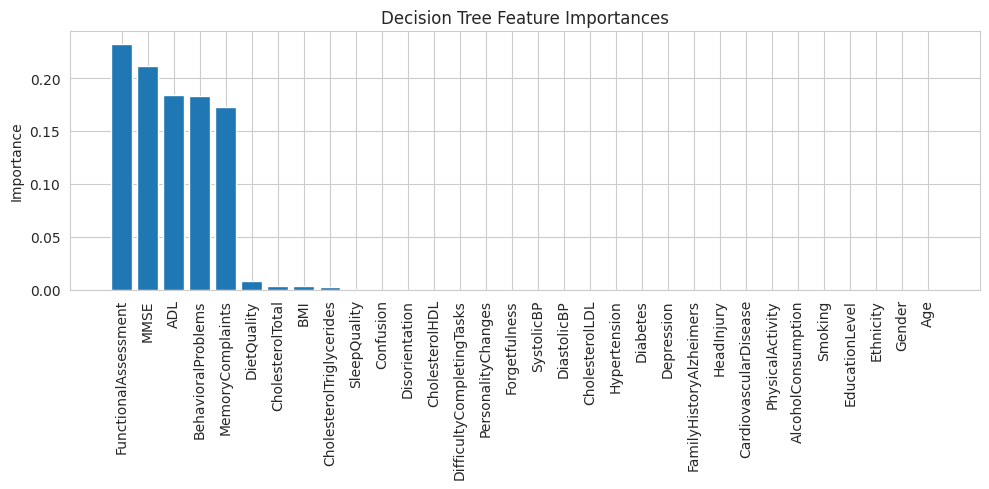

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [37]:
# 1. Detailed classification report and confusion matrix
y_pred_best = best_model.predict(X_test)

print("\n Classification Report (Best Decision Tree):")
print(classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
print(" Confusion Matrix:")
print(cm)

# 2. Feature importances
feature_names = list(X_train.columns)
importances = best_model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

print("\n Top 10 Features by Importance:")
for idx in sorted_idx[:10]:
    print(f"  {feature_names[idx]}: {importances[idx]:.3f}")

plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx],
           rotation=90)
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.show()




/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


 IF–THEN style rules from decision tree (depth <= 7):
|--- FunctionalAssessment <= 4.97
|   |--- MMSE <= 24.02
|   |   |--- ADL <= 5.12
|   |   |   |--- ADL <= 4.48
|   |   |   |   |--- CholesterolTriglycerides <= 324.19
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CholesterolTriglycerides >  324.19
|   |   |   |   |   |--- class: 1
|   |   |   |--- ADL >  4.48
|   |   |   |   |--- FunctionalAssessment <= 2.11
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- FunctionalAssessment >  2.11
|   |   |   |   |   |--- class: 1
|   |   |--- ADL >  5.12
|   |   |   |--- MemoryComplaints <= 0.50
|   |   |   |   |--- BehavioralProblems <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BehavioralProblems >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- MemoryComplaints >  0.50
|   |   |   |   |--- SleepQuality <= 8.63
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SleepQuality >  8.63
|   |   |   |   |   |--- class: 1
|   |--- MMSE >  24.02
|   |   |

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

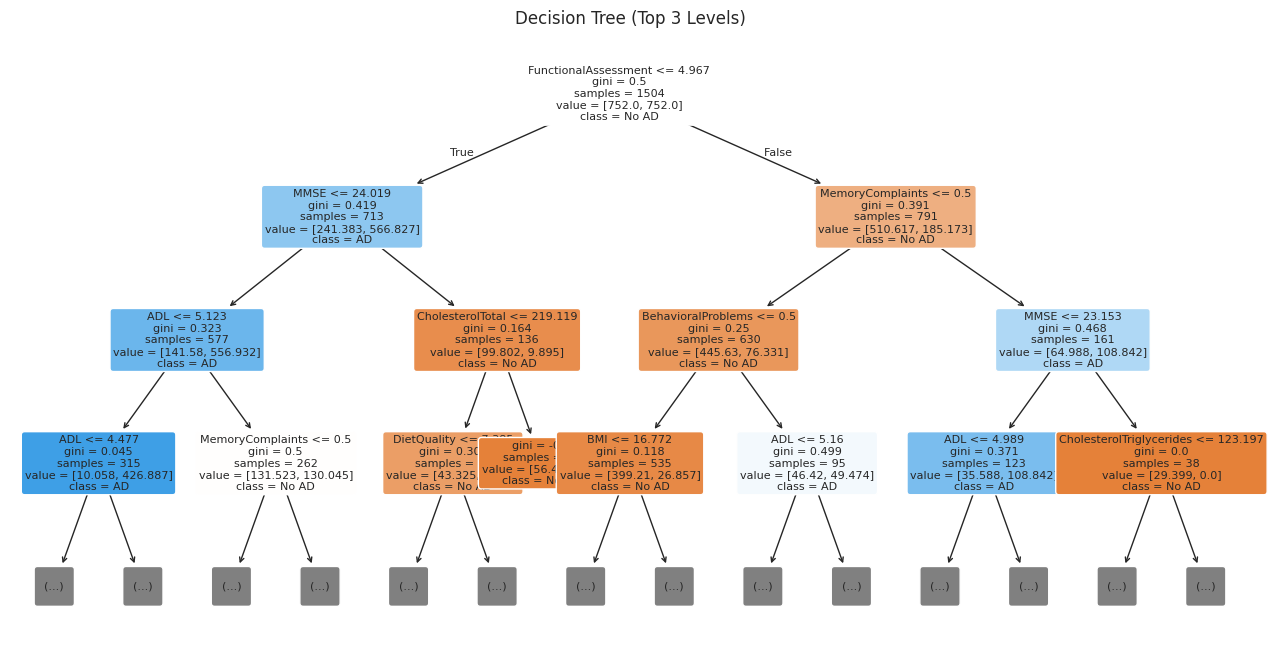

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [38]:
# 3. IF–THEN rules
tree_text = export_text(
    best_model,
    feature_names=feature_names,
    max_depth=7
)
print("\n IF–THEN style rules from decision tree (depth <= 7):")
print(tree_text)

# 4. Visualize the top layers of the tree
plt.figure(figsize=(16, 8))
plot_tree(
    best_model,
    feature_names=feature_names,
    class_names=['No AD', 'AD'],
    max_depth=3,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

**STEP 9: INTEGRATING ASSOCIATION RULES AND DECISION TREE SPLITS**

In [39]:
print("STEP 9: INTEGRATION OF RULES AND TREE FEATURES")

# 1. Extract feature names involved in antecedents (from rules_dx)
rule_features = set()
for ants in rules_dx['antecedents']:
    for item in list(ants):
        feat = str(item).split('=')[0]
        rule_features.add(feat)

print("\n Features appearing in association rule antecedents:")
print(sorted(rule_features))

# 2. Extract top features from the decision tree
top_tree_feats = [feature_names[i] for i in sorted_idx[:10]]
print("\n Top 10 features from decision tree:")
print(top_tree_feats)

# 3. Intersection
overlap = rule_features.intersection(top_tree_feats)
print("\n Overlap between rule antecedents and tree splits:")
print(overlap)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

STEP 9: INTEGRATION OF RULES AND TREE FEATURES

 Features appearing in association rule antecedents:
['Activity_Level', 'Age_Group', 'BMI_Category', 'BP_Category', 'BehavioralProblems', 'Cholesterol_Category', 'Forgetfulness', 'Gender', 'MMSE_Category', 'MemoryComplaints', 'Smoking']

 Top 10 features from decision tree:
['FunctionalAssessment', 'MMSE', 'ADL', 'BehavioralProblems', 'MemoryComplaints', 'DietQuality', 'CholesterolTotal', 'BMI', 'CholesterolTriglycerides', 'SleepQuality']

 Overlap between rule antecedents and tree splits:
{'BehavioralProblems', 'MemoryComplaints'}


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

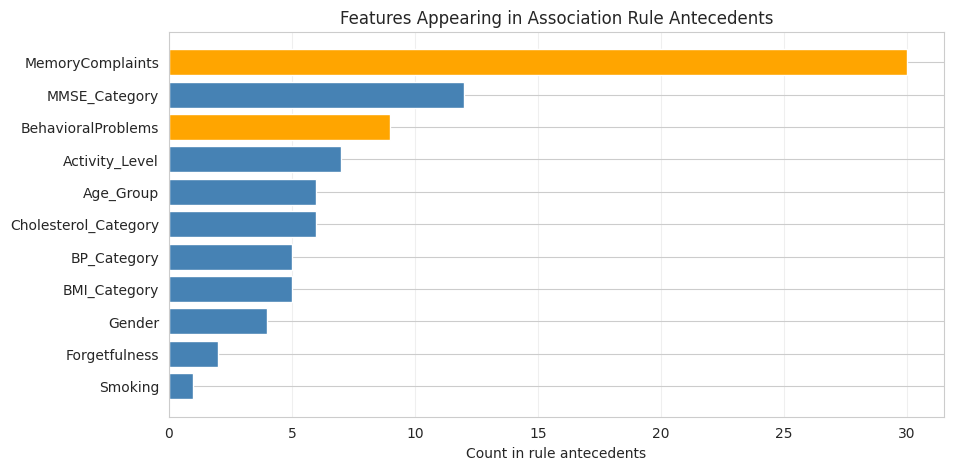

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [40]:
# @title
from collections import Counter
import matplotlib.pyplot as plt

#Plot features from association rule antecedents

# Count how many times each feature appears in rule antecedents
ante_counts = Counter()
for ants in rules_dx['antecedents']:
    for item in list(ants):
        feat = str(item).split('=')[0]
        ante_counts[feat] += 1

features_rules = list(ante_counts.keys())
counts_rules = list(ante_counts.values())

# Order by frequency (descending)
order_rules = sorted(range(len(features_rules)),
                     key=lambda i: counts_rules[i],
                     reverse=True)

features_rules_sorted = [features_rules[i] for i in order_rules]
counts_rules_sorted = [counts_rules[i] for i in order_rules]

# Color overlap features differently
colors_rules = []
for f in features_rules_sorted:
    if f in overlap:
        colors_rules.append("orange")   # in both rules + tree
    else:
        colors_rules.append("steelblue")

plt.figure(figsize=(10, 5))
plt.barh(features_rules_sorted, counts_rules_sorted, color=colors_rules)
plt.xlabel("Count in rule antecedents")
plt.title("Features Appearing in Association Rule Antecedents")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

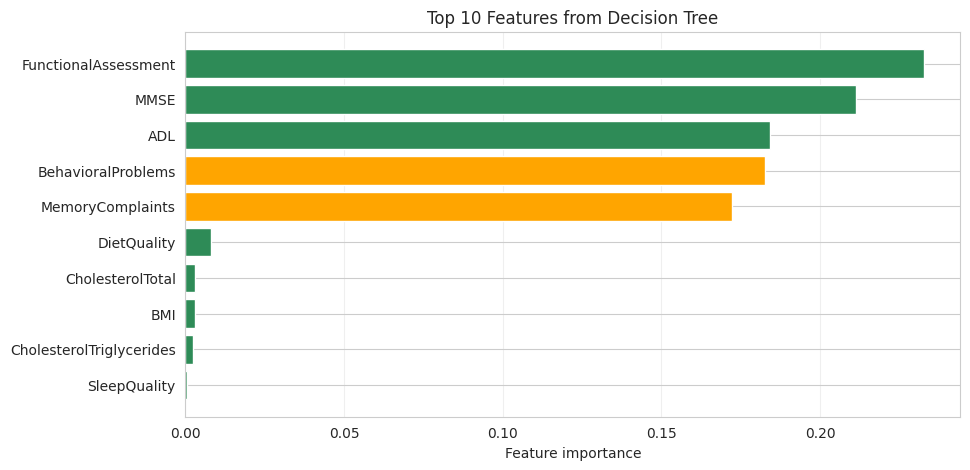

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [41]:
#Plot top 10 features from decision tree

top_idx = sorted_idx[:10]
top_tree_feats = [feature_names[i] for i in top_idx]
top_importances = [importances[i] for i in top_idx]

# Color overlap features differently
colors_tree = []
for f in top_tree_feats:
    if f in overlap:
        colors_tree.append("orange")    # in both rules + tree
    else:
        colors_tree.append("seagreen")

plt.figure(figsize=(10, 5))
plt.barh(top_tree_feats, top_importances, color=colors_tree)
plt.xlabel("Feature importance")
plt.title("Top 10 Features from Decision Tree")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.show()


In [42]:
print("Acc:", best_acc)
print("F1:", best_f1)
print(top_tree_feats)


Acc: 0.937984496124031
F1: 0.9122807017543859
['FunctionalAssessment', 'MMSE', 'ADL', 'BehavioralProblems', 'MemoryComplaints', 'DietQuality', 'CholesterolTotal', 'BMI', 'CholesterolTriglycerides', 'SleepQuality']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [43]:
print("Acc:", best_acc)
print("F1:", best_f1)
print(top_tree_feats)


Acc: 0.937984496124031
F1: 0.9122807017543859
['FunctionalAssessment', 'MMSE', 'ADL', 'BehavioralProblems', 'MemoryComplaints', 'DietQuality', 'CholesterolTotal', 'BMI', 'CholesterolTriglycerides', 'SleepQuality']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [44]:
rules_dx[['antecedents','support','confidence','lift']].head(10)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,support,confidence,lift
0,"(BP_Category=High, MMSE_Category=Severe_Impair...",0.037692,0.835052,2.361218
1,"(BMI_Category=Obese, MMSE_Category=Severe_Impa...",0.042811,0.821429,2.322697
2,"(MMSE_Category=Severe_Impairment, MemoryCompla...",0.030712,0.814815,2.303996
3,"(Activity_Level=Moderate, MMSE_Category=Severe...",0.038623,0.798077,2.256668
4,"(MMSE_Category=Severe_Impairment, MemoryCompla...",0.090740,0.786290,2.223339
5,"(Cholesterol_Category=High, MMSE_Category=Seve...",0.032573,0.769231,2.175101
6,"(Age_Group=80-90, MemoryComplaints=1, MMSE_Cat...",0.030712,0.767442,2.170043
7,"(Gender=1, BehavioralProblems=1, MMSE_Category...",0.030712,0.767442,2.170043
8,"(MemoryComplaints=1, MMSE_Category=Mild_Impair...",0.039553,0.765766,2.165303
9,"(MMSE_Category=Severe_Impairment, MemoryCompla...",0.031643,0.764045,2.160438


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [45]:
print(overlap)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

{'BehavioralProblems', 'MemoryComplaints'}


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [46]:
print(confusion_matrix(y_test, y_pred_best))


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

[[397  20]
 [ 20 208]]


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag